#  Group level windowed mean analysis of H4

each session consisted of 60 trials, participants did 3 sessions each

Look for tutorial on splitting epochs:

https://mne.tools/1.8/auto_tutorials/epochs/10_epochs_overview.html#selecting-epochs-by-index


What we need to do:
- split all epochs after 60 images, to have three trials
- possibly remove first 5 instances from all lists

In [358]:
# import libraries


import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import mne
from mne.preprocessing import ICA
import pandas as pd
from scipy.stats import zscore
from scipy import stats 


# Define variables

In [359]:
subject_names = ['group0-fw2', 'group1_fw', 'group9_fw', 'group10_fw',
                 'group18_fw', 'group19_fw', 'group20_fw']  # same length as all_epochs



In [360]:
# We used a different script to run FaceWord experiment on Monday where triggers 101 

# defining the events
event_id_monday_recording = {
    'Word/wPos': 11, # positive word
    'Wait/wPos': 31, # waiting time after positive word 
    'Image/wPos': 21, # positive image (always following pos word) 
    'Word/wNeg': 12, # negative word
    'Wait/wNeg': 32, # waiting time after negative word 
    'Image/wNeg': 22, # negative image (always following neg word) 
    'Word/wNeu': 13, # neutral word
    'Wait/wNeu/iPos': 51, # wait time after neu w (before pos i) 
    'Image/wNeu/iPos': 41, # positive image (after neu word) 
    'Wait/wNeu/iNeg': 52, # wait time after neu w (before neg i) 
    'Image/wNeu/iNeg': 42, # negative image (after neu word) 
    'Correct/wPos': 201, # correct response ('b') to pos w + image 
    'Correct/wNeg': 102, # correct response ('y') to neg w + image 
    'Correct/wNeu/iPos': 111, # cor resp ('b') to neu w + pos image 
    'Correct/wNeu/iNeg': 112, # cor resp ('y') to neu w + neg image 
    'Incorrect/wPos': 202, # incor resp ('y') to pos w + image 
    'Incorrect/wNeg': 101, # incor resp ('b') to neg w + image 
    'Incorrect/wNeu/iPos': 212, # incor resp ('y') to neu w + pos i 
    'Incorrect/Neu/iNeg': 211 # incor resp ('b') to neu w + neg i
}

event_id = {
    'Word/wPos': 11, # positive word
    'Wait/wPos': 31, # waiting time after positive word 
    'Image/wPos': 21, # positive image (always following pos word) 
    'Word/wNeg': 12, # negative word
    'Wait/wNeg': 32, # waiting time after negative word 
    'Image/wNeg': 22, # negative image (always following neg word) 
    'Word/wNeu': 13, # neutral word
    'Wait/wNeu/iPos': 51, # wait time after neu w (before pos i) 
    'Image/wNeu/iPos': 41, # positive image (after neu word) 
    'Wait/wNeu/iNeg': 52, # wait time after neu w (before neg i) 
    'Image/wNeu/iNeg': 42, # negative image (after neu word) 
    'Correct/wPos': 101, # correct response ('b') to pos w + image 
    'Correct/wNeg': 102, # correct response ('y') to neg w + image 
    'Correct/wNeu/iPos': 111, # cor resp ('b') to neu w + pos image 
    'Correct/wNeu/iNeg': 112, # cor resp ('y') to neu w + neg image 
    'Incorrect/wPos': 202, # incor resp ('y') to pos w + image 
    'Incorrect/wNeg': 201, # incor resp ('b') to neg w + image 
    'Incorrect/wNeu/iPos': 212, # incor resp ('y') to neu w + pos i 
    'Incorrect/Neu/iNeg': 211 # incor resp ('b') to neu w + neg i
}

# Load in the Epochs

In [361]:
def load_epochs(data_path: Path, picks: list[str] = ["eeg"], preload: bool = True) -> list[mne.epochs.EpochsFIF]:
    """
    This function loops over files in data_path and loads all files ending with "-epo.fif",
    while storing the subject name (filename) into metadata.
    """

    epochs = []  # Empty list for storing the epochs

    for f in data_path.iterdir():
        if f.name.endswith("-epo.fif"):
            try:
                tmp_epochs = mne.read_epochs(f, preload=preload)
                tmp_epochs.pick(picks)
                
                if tmp_epochs.metadata is None:
                    n_epochs = len(tmp_epochs)
                    tmp_epochs.metadata = pd.DataFrame(index=np.arange(n_epochs))
                
                tmp_epochs.metadata["subject"] = f.stem  # filename without extension

                epochs.append(tmp_epochs)
            except Exception as e:
                print(f"Error loading {f}: {e}")

    return epochs


In [362]:
# load in the data using the function

data_path = Path("epochs/final")

all_epochs = load_epochs(data_path, picks=["eeg"])



Reading /Users/rekaforgo/Downloads/epochs/final/group1_fw-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     696.00 ms
        0 CTF compensation matrices available
Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 0 columns
Reading /Users/rekaforgo/Downloads/epochs/final/group20_fw-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     696.00 ms
        0 CTF compensation matrices available
Not setting metadata
727 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 0 columns
Reading /Users/rekaforgo/Downloads/epochs/final/group9_fw-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     696.00 ms
        0 CTF compensation matrices available
Not setting metadata
739 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 0 columns
Reading /Users/rek

## Counting epochs

In [363]:
#count number of events for Image/wNeu/iPos and Image/wNeu/iNeg

for epochs in all_epochs:
    epochs_neu_pos = epochs['Image/wNeu/iPos']
    epochs_neu_neg = epochs['Image/wNeu/iNeg']
    print(f"Number of events for Image/wNeu/iPos: {len(epochs_neu_pos)}")
    print(f"Number of events for Image/wNeu/iNeg: {len(epochs_neu_neg)}")

Number of events for Image/wNeu/iPos: 33
Number of events for Image/wNeu/iNeg: 27
Number of events for Image/wNeu/iPos: 33
Number of events for Image/wNeu/iNeg: 28
Number of events for Image/wNeu/iPos: 31
Number of events for Image/wNeu/iNeg: 31
Number of events for Image/wNeu/iPos: 35
Number of events for Image/wNeu/iNeg: 25
Number of events for Image/wNeu/iPos: 32
Number of events for Image/wNeu/iNeg: 29
Number of events for Image/wNeu/iPos: 28
Number of events for Image/wNeu/iNeg: 31
Number of events for Image/wNeu/iPos: 24
Number of events for Image/wNeu/iNeg: 36
Number of events for Image/wNeu/iPos: 33
Number of events for Image/wNeu/iNeg: 28


In [364]:
#all epoch channel names
for epochs in all_epochs:
    print(epochs.ch_names)
    
    

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2']
['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'C3', 'Cz', 'C4', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2']
['F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2']
['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2']
['F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2']
['Fz', 'F4', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5'

## LPP analysis

In [365]:
#for LPP analysis
picks = ["Fz","Cz","Pz"]

#time window
tmin = 0.3
tmax = 0.6

In [366]:
for epochs in all_epochs:
    #print len of Image epochs
    print(len(epochs['Image']))

180
182
185
179
181
177
180
182


In [367]:
# create empty arrays to store the data 

#for LPP analysis
picks = ["Fz","Cz","Pz"]

#time window
tmin = 0.3
tmax = 0.6

first_session = np.array([])
second_session = np.array([])
third_session = np.array([])

for epochs in all_epochs:
    epochs_img = epochs["Image"]

    epochs1 = epochs_img[5:60]    
    epochs2 = epochs_img[65:120] 
    epochs3 = epochs_img[125:] 

    # Compute mean amplitude for first block (or NaN if missing)
    data1 = epochs1.get_data(picks=picks, tmin=tmin, tmax=tmax)

    data2 = epochs2.get_data(picks=picks, tmin=tmin, tmax=tmax)
    data3 = epochs3.get_data(picks=picks, tmin=tmin, tmax=tmax)

    data2_mean = np.mean(data2, axis=(0, 1, 2))
    data3_mean = np.mean(data3, axis=(0, 1, 2))
    data1_mean = np.mean(data1, axis=(0, 1, 2))

    first_session = np.append(first_session, data1_mean)
    second_session = np.append(second_session, data2_mean)
    third_session = np.append(third_session, data3_mean)

print(first_session)
print(second_session)
print(third_session)

[ 2.25913298e-06  1.80476093e-06 -1.16966217e-06  8.27389188e-07
  1.12386995e-06 -8.80658482e-08  5.25099548e-07  2.79130282e-06]
[ 1.94559544e-06  1.94725626e-06 -3.06117131e-07  1.53643440e-06
  9.65624301e-07  1.77554001e-06  1.70385059e-06  2.62300713e-06]
[1.75828476e-06 1.69811901e-06 5.51953019e-07 8.96146592e-07
 1.08782915e-06 1.60001326e-06 1.48406234e-06 2.27419976e-06]


In [368]:
#for LPP analysis across pos and neg
picks = ["Fz","Cz","Pz"]

#time window
tmin = 0.3
tmax = 0.6


# create empty arrays to store the data 
first_session_pos = np.array([])
second_session_pos = np.array([])
third_session_pos = np.array([])

first_session_neg = np.array([])
second_session_neg = np.array([])
third_session_neg = np.array([])



for epochs in all_epochs:
    epochs_img_pos = epochs["Image/wPos"]
    epochs_img_neg = epochs["Image/wNeg"]

    epochs1_pos = epochs_img_pos[5:20]    
    epochs2_pos = epochs_img_pos[25:40] 
    epochs3_pos = epochs_img_pos[40:] 

    epochs1_neg = epochs_img_neg[5:20]    
    epochs2_neg = epochs_img_neg[25:40] 
    epochs3_neg = epochs_img_neg[40:] 

    # Compute mean amplitude for first block (or NaN if missing)
    data1_pos = epochs1_pos.get_data(picks=picks, tmin=tmin, tmax=tmax)
    data2_pos = epochs2_pos.get_data(picks=picks, tmin=tmin, tmax=tmax)
    data3_pos = epochs3_pos.get_data(picks=picks, tmin=tmin, tmax=tmax)

    data2_pos_mean = np.mean(data2_pos, axis=(0, 1, 2))
    data3_pos_mean = np.mean(data3_pos, axis=(0, 1, 2))
    data1_pos_mean = np.mean(data1_pos, axis=(0, 1, 2))

    first_session_pos = np.append(first_session_pos, data1_pos_mean)
    second_session_pos = np.append(second_session_pos, data2_pos_mean)
    third_session_pos = np.append(third_session_pos, data3_pos_mean)

    data1_neg = epochs1_neg.get_data(picks=picks, tmin=tmin, tmax=tmax)
    data2_neg = epochs2_neg.get_data(picks=picks, tmin=tmin, tmax=tmax)
    data3_neg = epochs3_neg.get_data(picks=picks, tmin=tmin, tmax=tmax)

    data2_neg_mean = np.mean(data2_neg, axis=(0, 1, 2))
    data3_neg_mean = np.mean(data3_neg, axis=(0, 1, 2))
    data1_neg_mean = np.mean(data1_neg, axis=(0, 1, 2))

    first_session_neg = np.append(first_session_neg, data1_neg_mean)
    second_session_neg = np.append(second_session_neg, data2_neg_mean)
    third_session_neg = np.append(third_session_neg, data3_neg_mean)

print(first_session_pos)
print(second_session_pos)
print(third_session_pos)
print(first_session_neg)
print(second_session_neg)
print(third_session_neg)

[ 3.28102489e-06  1.74012428e-06 -2.84726368e-07  1.62132307e-06
  1.38492445e-06  8.14779870e-07  1.08715509e-06  5.38083326e-06]
[ 1.40478933e-06  1.93552419e-06 -9.26398203e-07  2.33287209e-06
  1.97079820e-07  2.32785737e-06  2.96785179e-06  3.10078307e-06]
[2.10850743e-06 2.12813334e-06 4.16224995e-07 1.67682673e-06
 1.65175612e-06 1.10233977e-06 2.05866465e-06 2.36033526e-06]
[ 2.12713451e-06  1.64724301e-06 -1.57419022e-06 -3.07433314e-07
  1.29537097e-06 -1.15065519e-06  5.20456626e-07  3.55502169e-06]
[2.51394795e-06 2.63075861e-06 1.63537753e-06 8.07629398e-07
 9.29275495e-07 8.95631160e-07 2.21046673e-06 1.89131606e-06]
[ 1.22395763e-06  6.20066057e-07  1.29261985e-06 -4.04671723e-08
  3.80419995e-07  2.36099543e-06  1.07590301e-06  2.49377879e-06]


In [369]:
from scipy import stats

# Paired t-test: first vs second
print("1st vs 2nd:", stats.ttest_rel(first_session, second_session))
# Paired t-test: first vs third
print("1st vs 3rd:", stats.ttest_rel(first_session, third_session))
# Paired t-test: second vs third
print("2nd vs 3rd:", stats.ttest_rel(second_session, third_session))




1st vs 2nd: TtestResult(statistic=-1.8874564599449595, pvalue=0.10105246727559872, df=7)
1st vs 3rd: TtestResult(statistic=-1.2590596451682687, pvalue=0.248368457800678, df=7)
2nd vs 3rd: TtestResult(statistic=0.6715793031559333, pvalue=0.5233888410602638, df=7)


In [370]:
from scipy import stats
# Paired t-test: first vs second
print("1st vs 2nd:", stats.ttest_rel(first_session_pos, second_session_pos))
# Paired t-test: first vs third
print("1st vs 3rd:", stats.ttest_rel(first_session_pos, third_session_pos))
# Paired t-test: second vs third
print("2nd vs 3rd:", stats.ttest_rel(second_session_pos, third_session_pos))
# Paired t-test: first vs second
print("1st vs 2nd:", stats.ttest_rel(first_session_neg, second_session_neg))
# Paired t-test: first vs third
print("1st vs 3rd:", stats.ttest_rel(first_session_neg, third_session_neg))
# Paired t-test: second vs third
print("2nd vs 3rd:", stats.ttest_rel(second_session_neg, third_session_neg))
# Paired t-test: first vs second


#paired between 1st and 1st
print("1st vs 1st:", stats.ttest_rel(first_session_pos, first_session_neg))
#paired between 2nd and 2nd
print("2nd vs 2nd:", stats.ttest_rel(second_session_pos, second_session_neg))
#paired between 3rd and 3rd
print("3rd vs 3rd:", stats.ttest_rel(third_session_pos, third_session_neg))

1st vs 2nd: TtestResult(statistic=0.3873699481118507, pvalue=0.7099908986550553, df=7)
1st vs 3rd: TtestResult(statistic=0.4120031697526167, pvalue=0.6926610946604752, df=7)
2nd vs 3rd: TtestResult(statistic=-0.05456054604471537, pvalue=0.9580131181395748, df=7)
1st vs 2nd: TtestResult(statistic=-1.7440253634771565, pvalue=0.12467487751448143, df=7)
1st vs 3rd: TtestResult(statistic=-0.6369291849099488, pvalue=0.5444299728665, df=7)
2nd vs 3rd: TtestResult(statistic=1.3151315924433709, pvalue=0.2299066396409231, df=7)
1st vs 1st: TtestResult(statistic=4.011294006834434, pvalue=0.0051158840664492005, df=7)
2nd vs 2nd: TtestResult(statistic=-0.041726906915087264, pvalue=0.9678816465766127, df=7)
3rd vs 3rd: TtestResult(statistic=1.286953111240709, pvalue=0.2390305780077125, df=7)


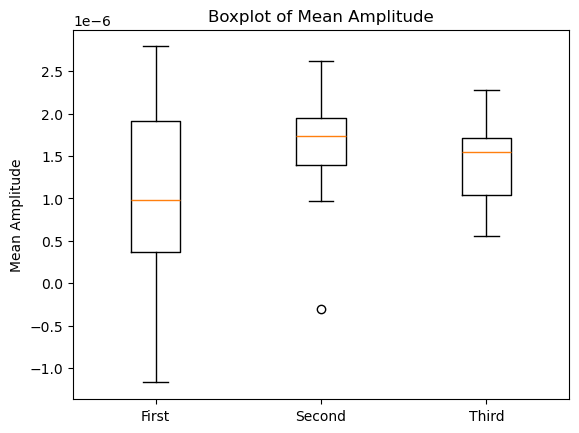

In [371]:
data = [first_session, second_session, third_session]
# Create a DataFrame


plt.boxplot(data, tick_labels=['First', 'Second', 'Third'])
plt.title('Boxplot of Mean Amplitude')
plt.ylabel('Mean Amplitude')
plt.show();


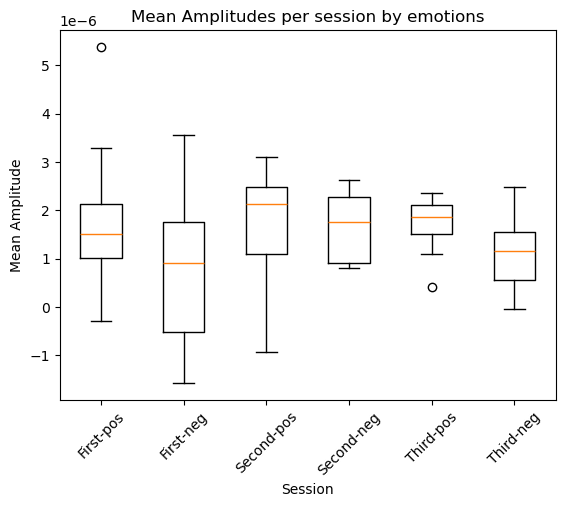

In [372]:

# Organize the data
data = [first_session_pos, first_session_neg, second_session_pos, second_session_neg, third_session_pos, third_session_neg]

# Create the boxplot
plt.boxplot(data, tick_labels=["First-pos", "First-neg", "Second-pos","Second-neg", "Third-pos", "Third-neg"])
plt.xticks(rotation=45)
plt.xlabel("Session")
plt.ylabel("Mean Amplitude")
plt.title("Mean Amplitudes per session by emotions")
plt.show()


In [373]:
#for LPP analysis
picks = ["Fz","Cz","Pz"]

#time window
tmin = 0.3
tmax = 0.6


# prep data for plotting

first_session = np.array([])
second_session = np.array ([])
third_session = np.array([])

#slicing based on trials - each showing 60 images

for epochs in all_epochs:
    n_trials = len(epochs["Image"])
    epochs_img = epochs["Image"]

    epochs1 = epochs_img[5:60]
    epochs2 = epochs_img[65:120]
    epochs3 = epochs_img[125:]

    
    data1 = epochs1.get_data(picks=picks)
    data2 = epochs2.get_data(picks=picks)
    data3 = epochs3.get_data(picks=picks)
    
    data1_mean = np.mean(data1, axis=(0, 1))
    data2_mean = np.mean(data2, axis=(0, 1))
    data3_mean = np.mean(data3, axis=(0, 1))

    # calculate the mean over the channel and trial dimension (axis 1 and 2)
    # we keep the time dimension (axis 0) to plot the time course
    first_session = np.concatenate((first_session, data1_mean), axis=0)
    second_session = np.concatenate((second_session, data2_mean), axis = 0)
    third_session = np.concatenate((third_session, data3_mean), axis = 0)
    

print(first_session.shape)
print(second_session.shape)
print(third_session.shape)

#reshape to participant, time
first_session = first_session.reshape(8, 200)
second_session = second_session.reshape(8, 200)
third_session = third_session.reshape(8, 200)


print(first_session.shape)
print(second_session.shape)
print(third_session.shape)



(1600,)
(1600,)
(1600,)
(8, 200)
(8, 200)
(8, 200)


In [374]:
#for LPP analysis
picks = ["Fz","Cz","Pz"]

#time window
tmin = 0.3
tmax = 0.6


# prep data for plotting

first_session_pos = np.array([])
second_session_pos = np.array ([])
third_session_pos = np.array([])

first_session_neg = np.array([])
second_session_neg = np.array ([])
third_session_neg = np.array([])

#slicing based on trials - each showing 60 images

for epochs in all_epochs:
    epochs_img_pos = epochs["Image/wPos"]
    epochs_img_neg = epochs["Image/wNeg"]

    epochs1_pos = epochs_img_pos[5:20]
    epochs2_pos = epochs_img_pos[25:40]
    epochs3_pos = epochs_img_pos[40:]
    epochs1_neg = epochs_img_neg[5:20]
    epochs2_neg = epochs_img_neg[25:40]
    epochs3_neg = epochs_img_neg[40:]
    # Compute mean amplitude for first block (or NaN if missing)
    data1_pos = epochs1_pos.get_data(picks=picks)
    data2_pos = epochs2_pos.get_data(picks=picks)
    data3_pos = epochs3_pos.get_data(picks=picks)
    data1_neg = epochs1_neg.get_data(picks=picks)
    data2_neg = epochs2_neg.get_data(picks=picks)
    data3_neg = epochs3_neg.get_data(picks=picks)

    data1_pos_mean = np.mean(data1_pos, axis=(0, 1))
    data2_pos_mean = np.mean(data2_pos, axis=(0, 1))
    data3_pos_mean = np.mean(data3_pos, axis=(0, 1))
    data1_neg_mean = np.mean(data1_neg, axis=(0, 1))
    data2_neg_mean = np.mean(data2_neg, axis=(0, 1))
    data3_neg_mean = np.mean(data3_neg, axis=(0, 1))
    # calculate the mean over the channel and trial dimension (axis 1 and 2)
    # we keep the time dimension (axis 0) to plot the time course
    first_session_pos = np.concatenate((first_session_pos, data1_pos_mean), axis=0)
    second_session_pos = np.concatenate((second_session_pos, data2_pos_mean), axis = 0)
    third_session_pos = np.concatenate((third_session_pos, data3_pos_mean), axis = 0)
    first_session_neg = np.concatenate((first_session_neg, data1_neg_mean), axis=0)
    second_session_neg = np.concatenate((second_session_neg, data2_neg_mean), axis = 0)
    third_session_neg = np.concatenate((third_session_neg, data3_neg_mean), axis = 0)




#reshape to participant, time
first_session_pos = first_session_pos.reshape(8, 200)
second_session_pos = second_session_pos.reshape(8, 200)
third_session_pos = third_session_pos.reshape(8, 200)

first_session_neg = first_session_neg.reshape(8, 200)
second_session_neg = second_session_neg.reshape(8, 200)
third_session_neg = third_session_neg.reshape(8, 200)
# Print the shapes of the reshaped arrays
print(first_session_pos.shape)
print(second_session_pos.shape)
print(third_session_pos.shape)
print(first_session_neg.shape)
print(second_session_neg.shape)
print(third_session_neg.shape)


(8, 200)
(8, 200)
(8, 200)
(8, 200)
(8, 200)
(8, 200)


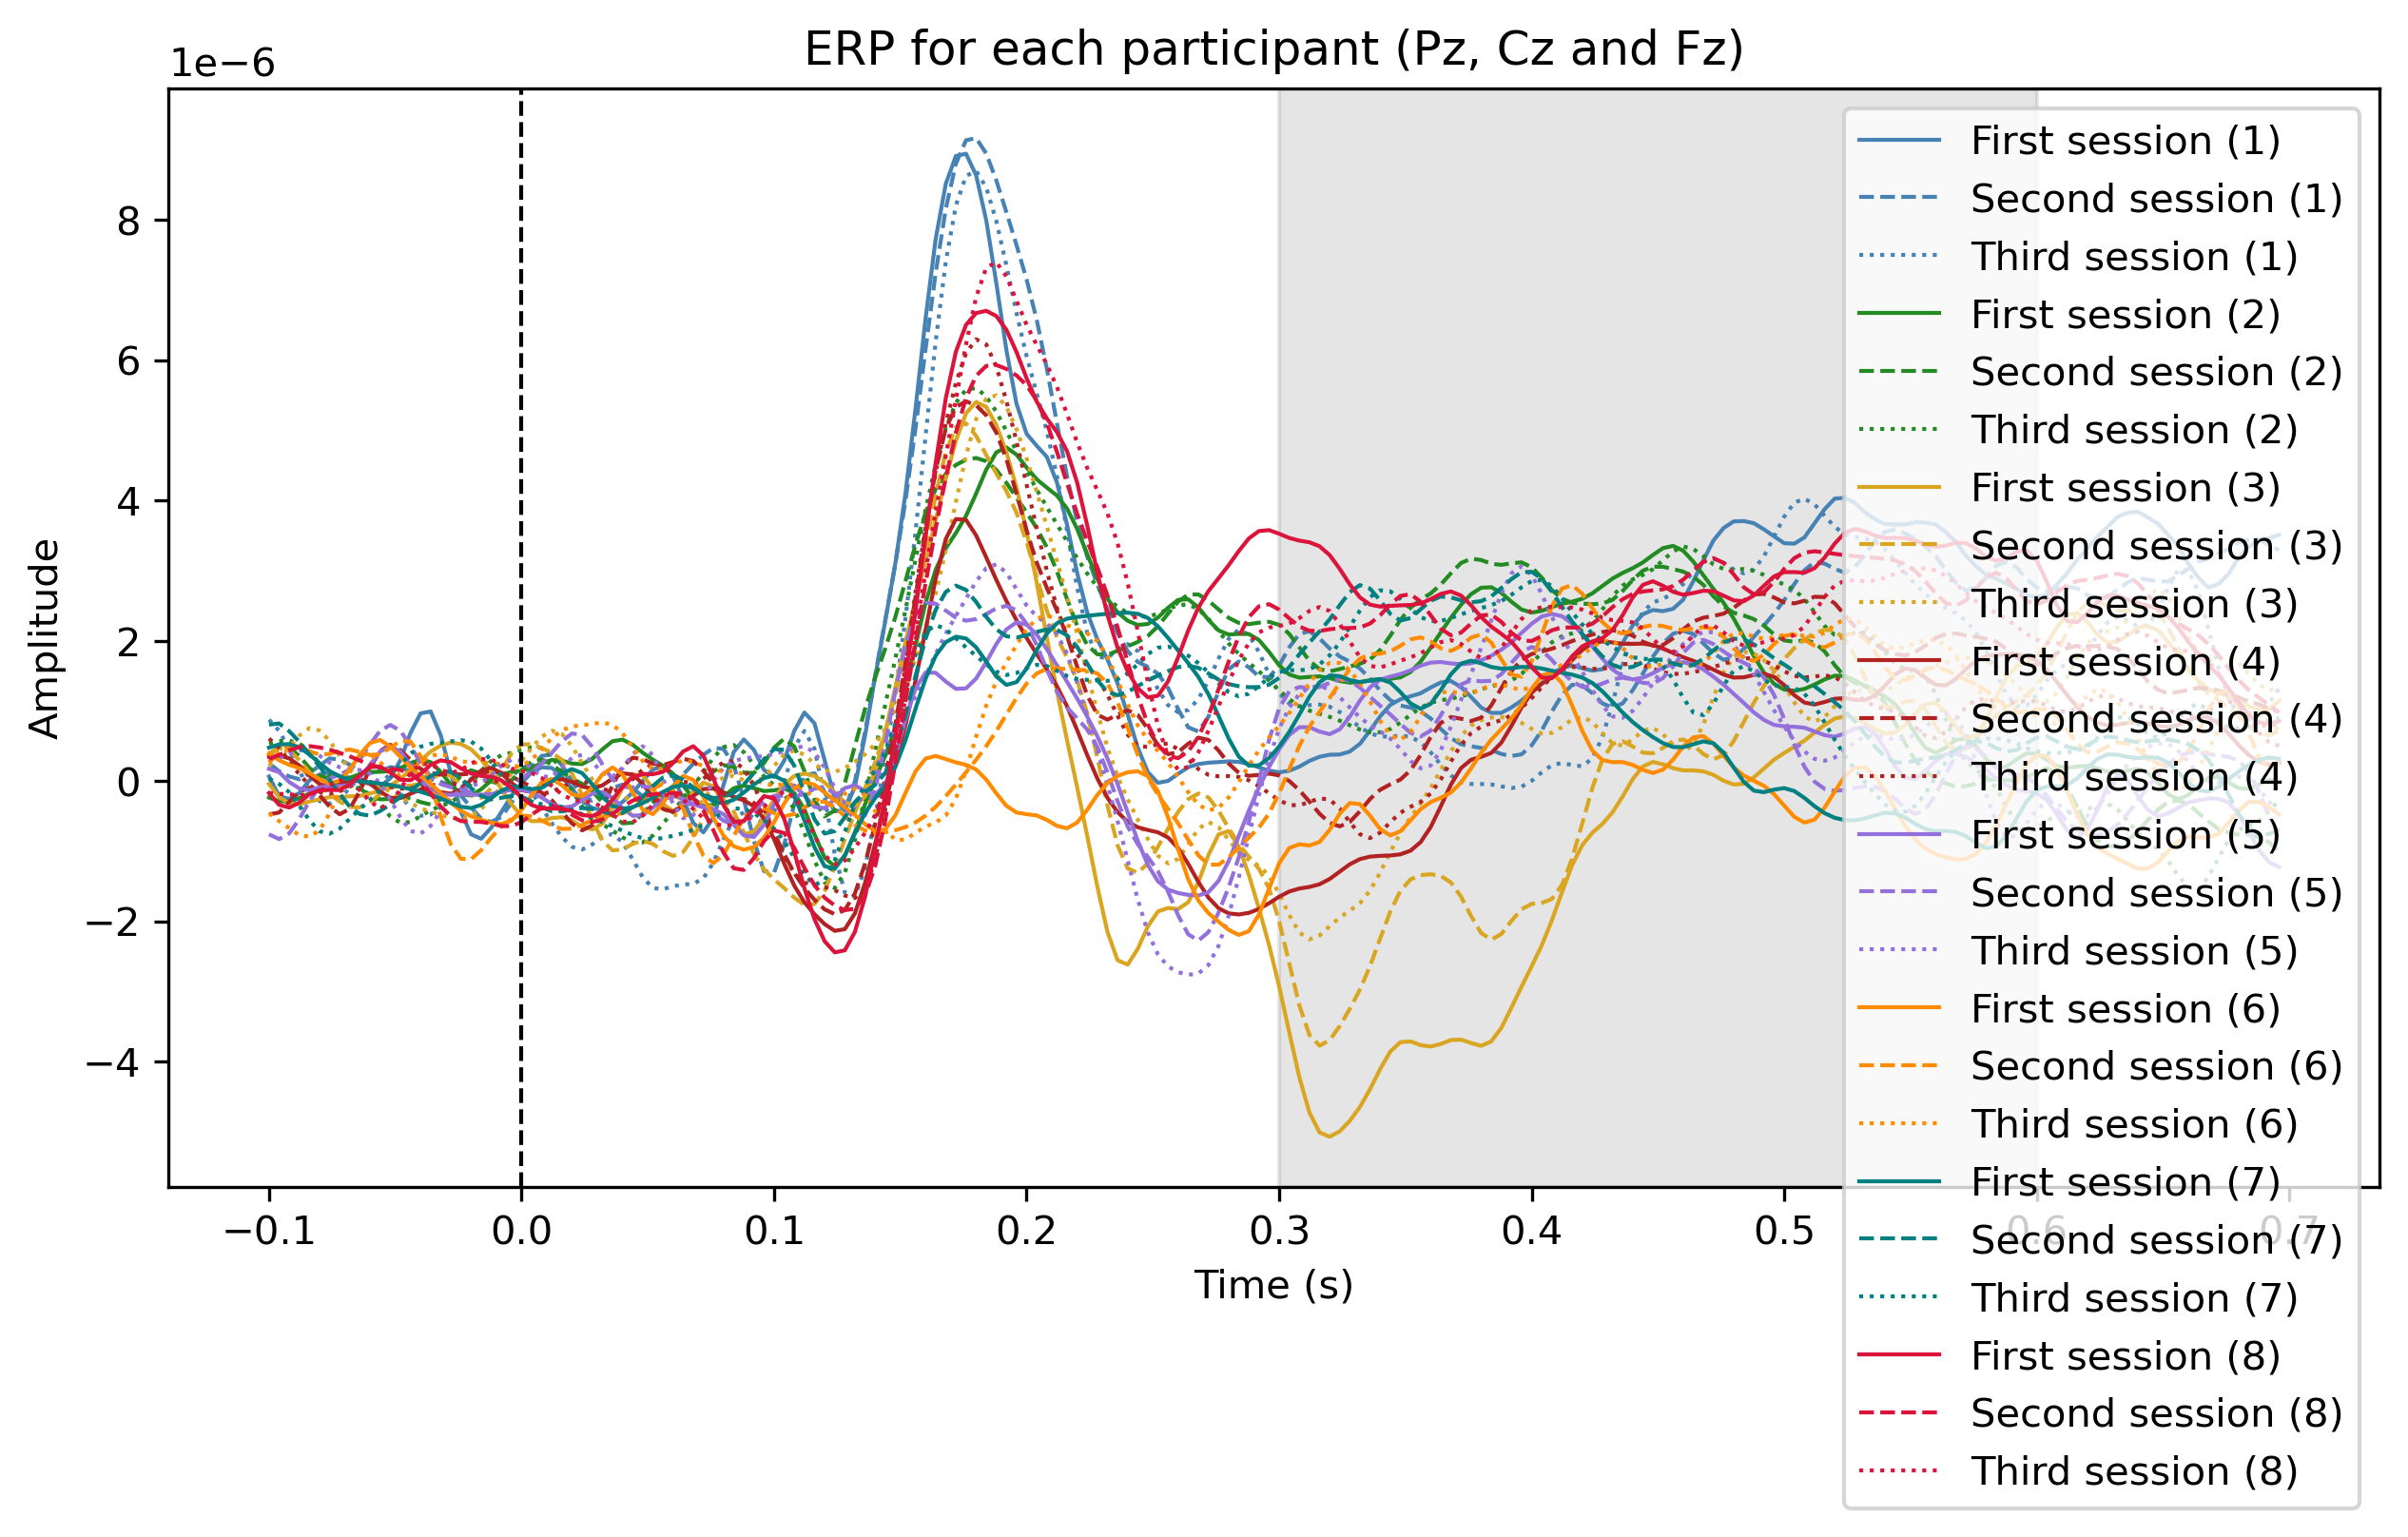

In [375]:
#for LPP analysis
picks = ["Fz","Cz","Pz"]

#time window
tmin = 0.3
tmax = 0.6



# plotting averaged timecourses for each participant
colours = [
    "steelblue",
    "forestgreen",
    "goldenrod",
    "firebrick",
    "mediumpurple",
    "darkorange",
    "teal",
    "crimson",
    "darkcyan",
    "slateblue",
    "olivedrab",
    "deeppink",
    "cadetblue",
    "indianred"
]

times = all_epochs[0].times

fig, ax = plt.subplots(1, figsize=(10, 5), dpi=300)

# plot the time window
ax.axvspan(tmin, tmax, color="grey", alpha=0.2)

for participant in range(8):

    ax.plot(times, first_session[participant, :], label=f"First session ({participant+1})", linestyle="-", color=colours[participant], linewidth=1)
    ax.plot(times, second_session[participant, :], label=f"Second session ({participant+1})", linestyle="--", color=colours[participant], linewidth=1)
    ax.plot(times, third_session[participant, :], label=f"Third session ({participant+1})", linestyle=":", color=colours[participant], linewidth=1)


# vertical line at 0
ax.axvline(x=0, color="black", linestyle="--", linewidth=1)

ax.set(xlabel="Time (s)", ylabel="Amplitude", title="ERP for each participant (Pz, Cz and Fz)")
ax.legend()

plt.savefig("erp_participants.png", format="png", dpi=300, bbox_inches="tight")
plt.show();



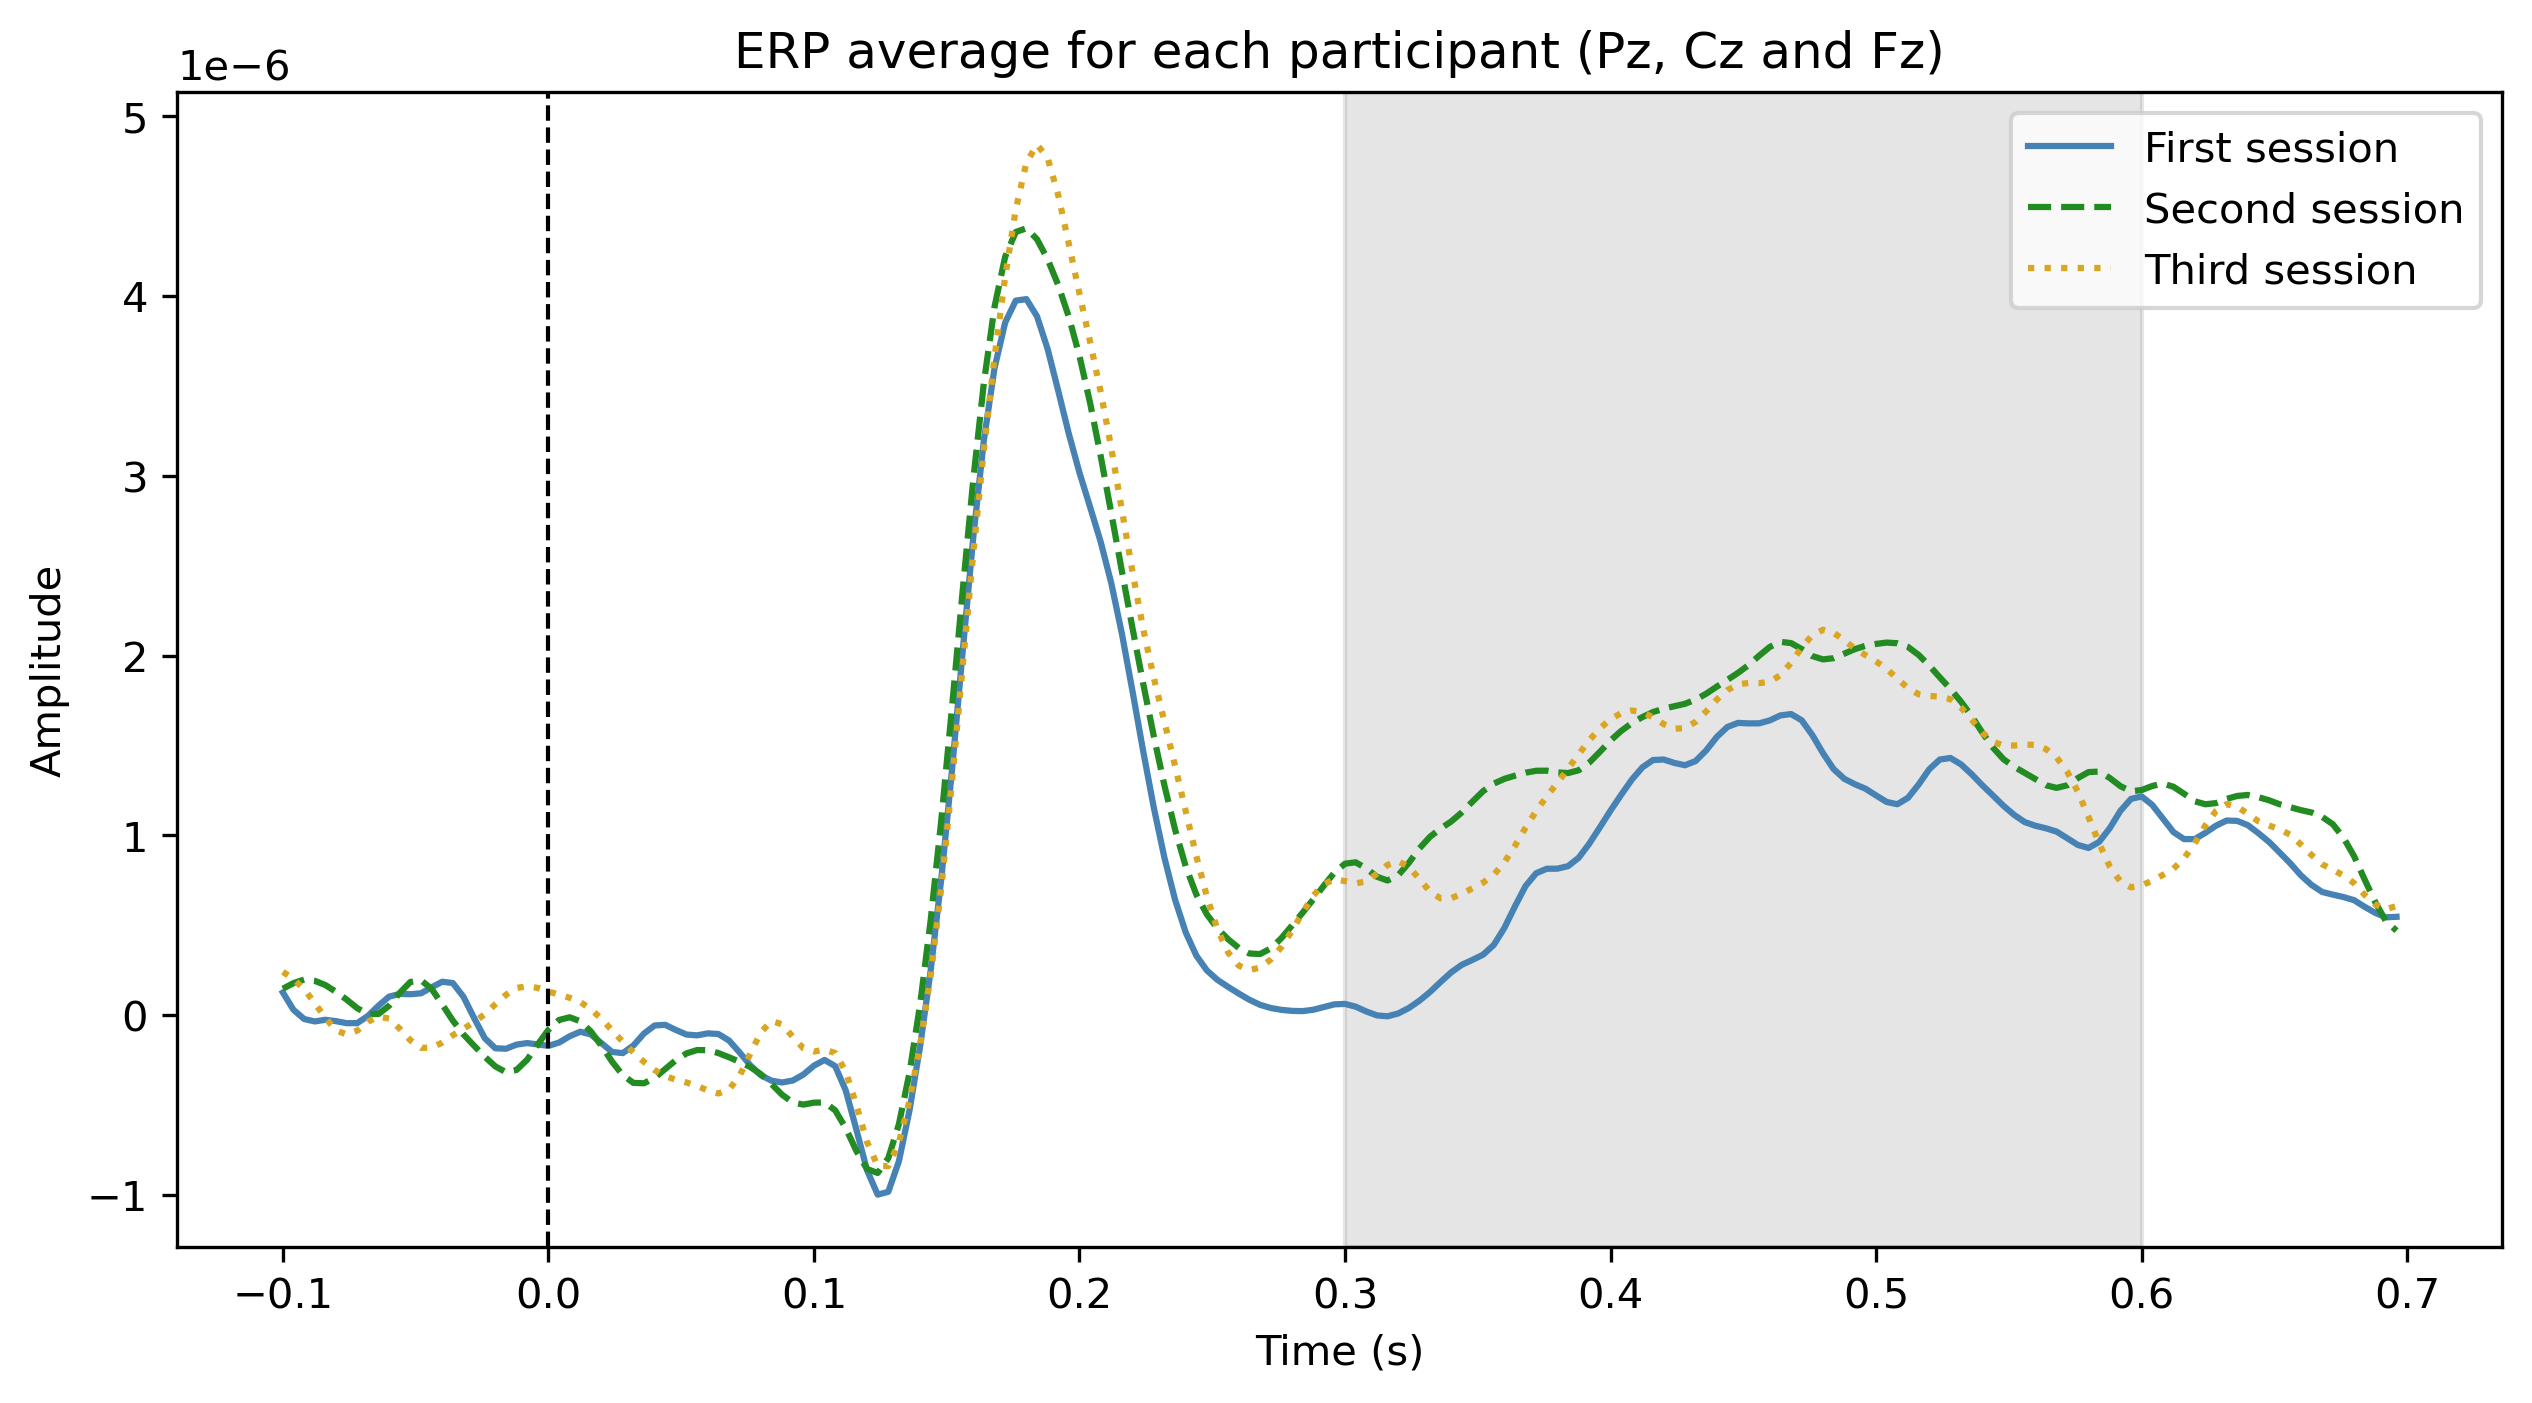

In [376]:
#for LPP analysis
picks = ["Fz","Cz","Pz"]

#time window
tmin = 0.3
tmax = 0.6


# averaging over participants
fig, ax = plt.subplots(1, figsize=(10, 5), dpi=300)

# plot the time window
ax.axvspan(tmin, tmax, color="grey", alpha=0.2)

ax.plot(times, first_session.mean(axis=0), label="First session", linestyle="-", color=colours[0])
ax.plot(times, second_session.mean(axis=0), label="Second session", linestyle="--", color=colours[1])
ax.plot(times, third_session.mean(axis=0), label="Third session", linestyle=":", color=colours[2])

# vertical line at 0
ax.axvline(x=0, color="black", linestyle="--", linewidth=1)

ax.set(xlabel="Time (s)", ylabel="Amplitude", title="ERP average for each participant (Pz, Cz and Fz)")
ax.legend()

plt.savefig("erp_avg_LPP.png", format="png", dpi=300, bbox_inches="tight")

plt.show();

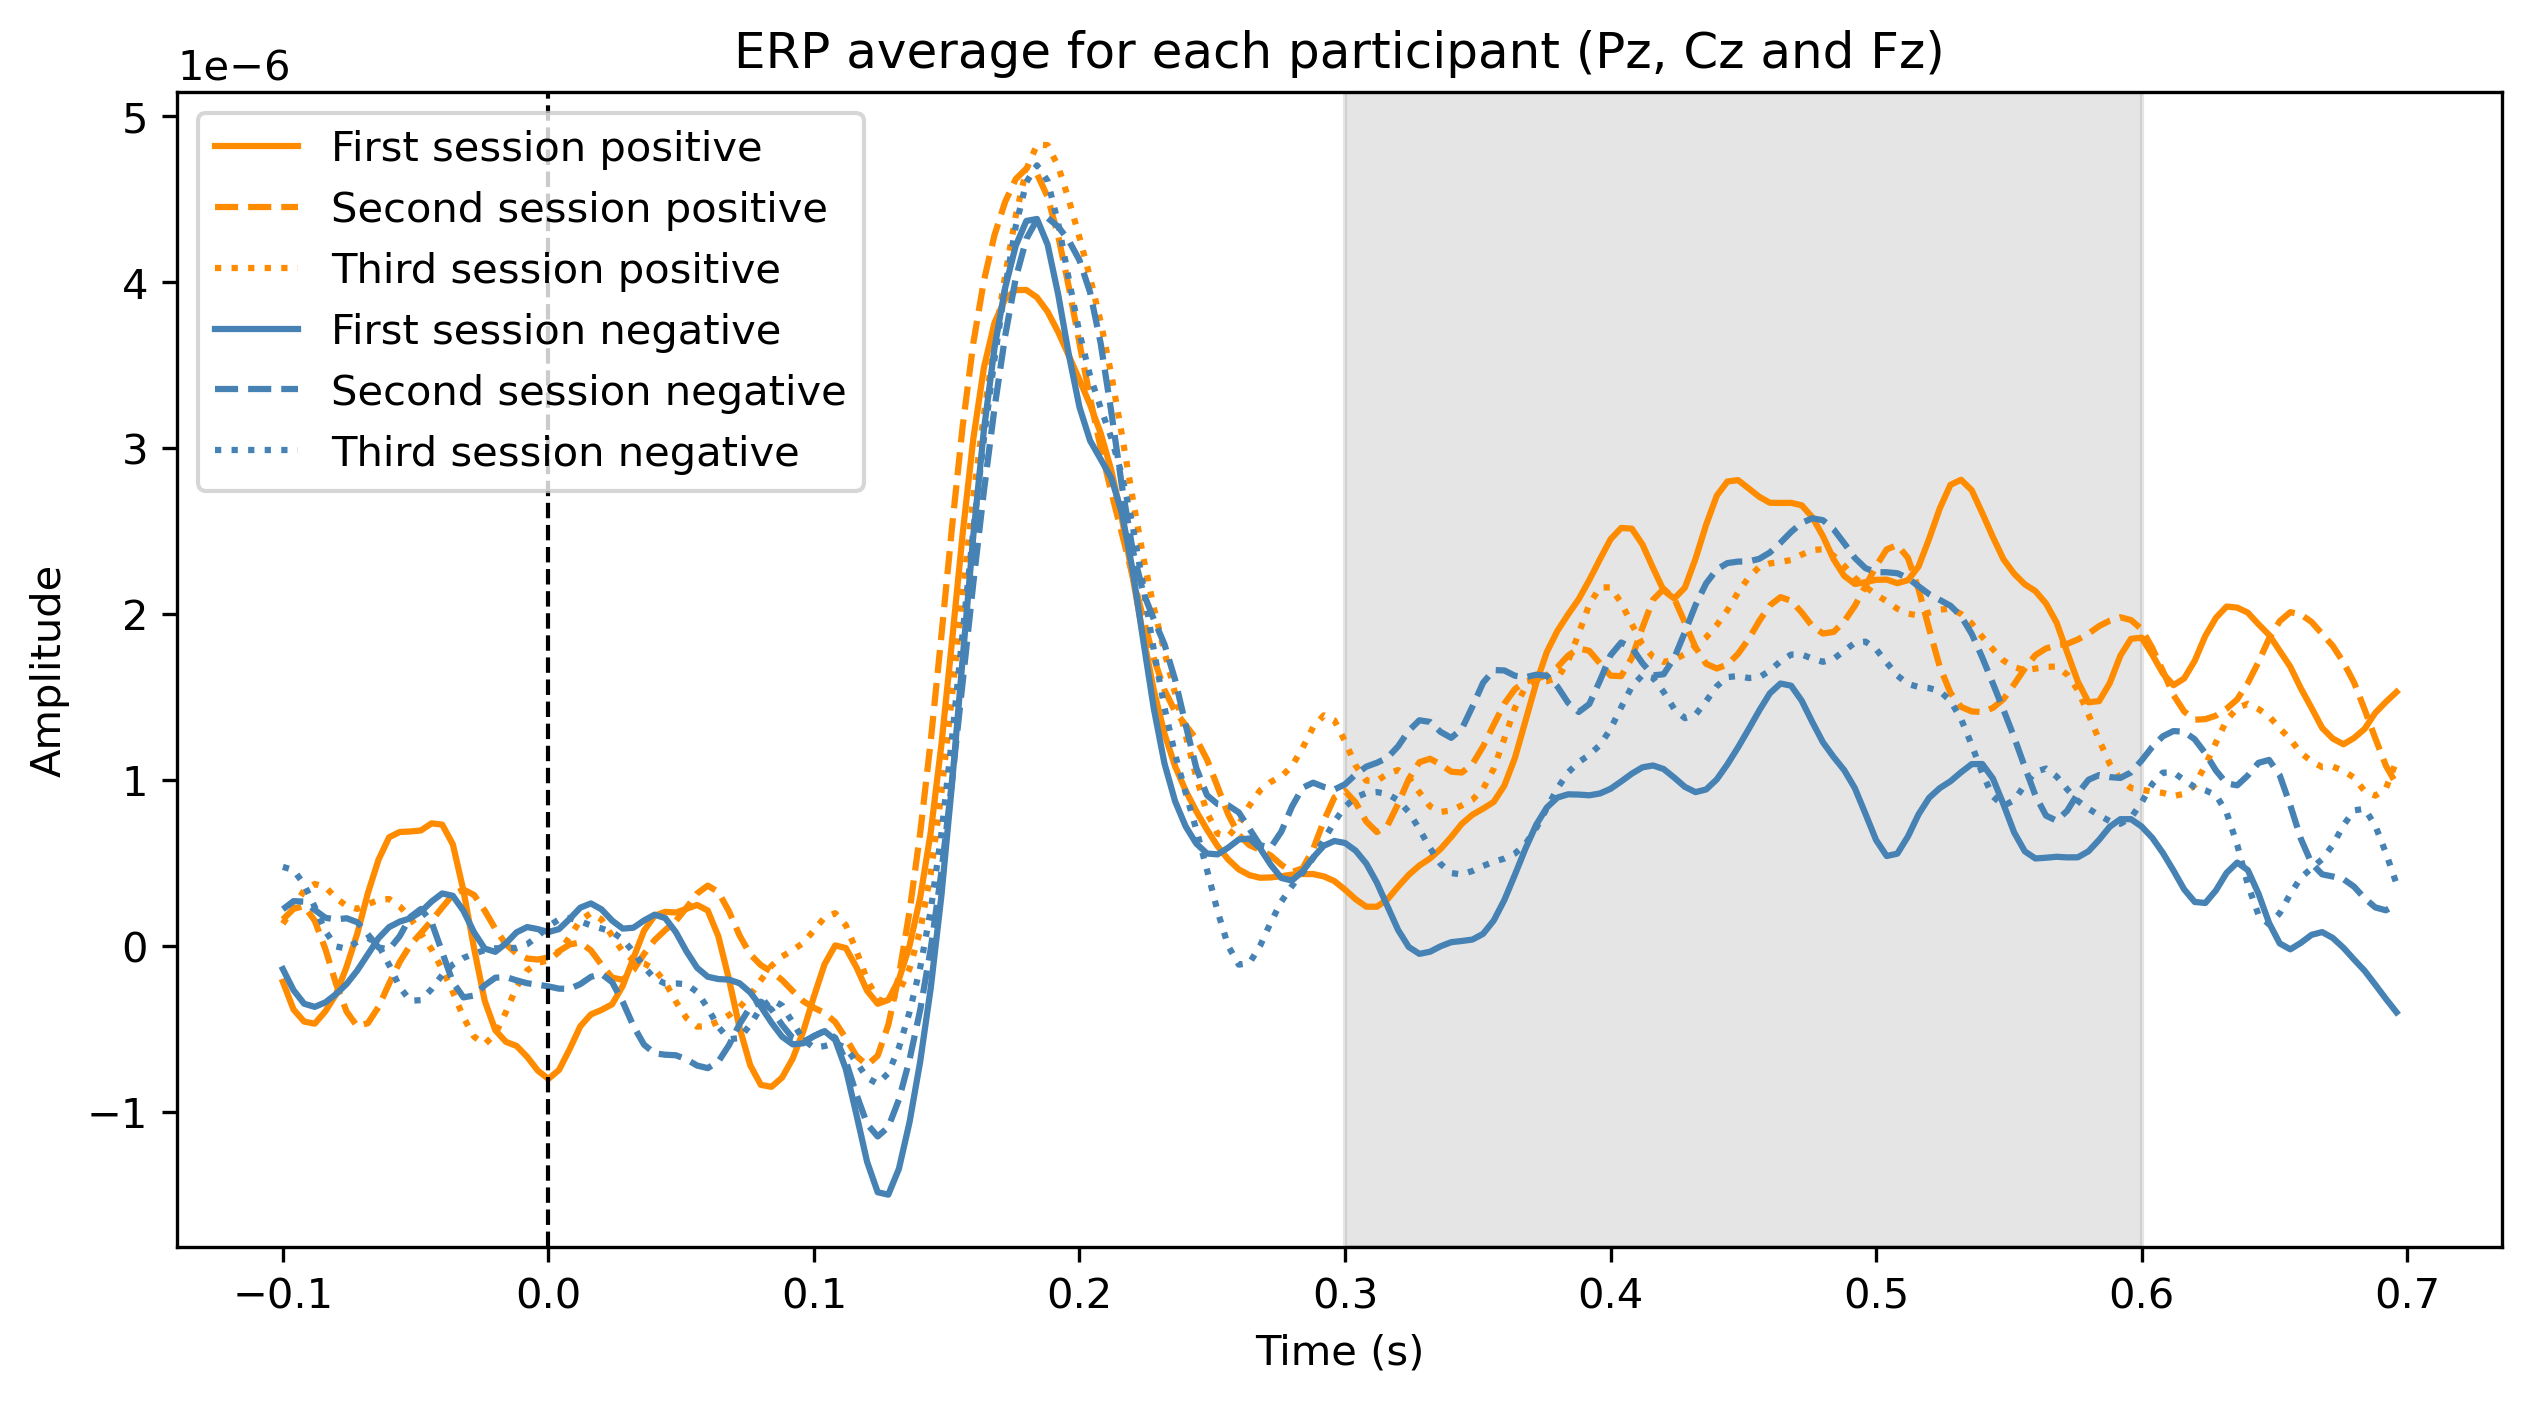

In [377]:
# averaging over participants for pos and neg separately

fig, ax = plt.subplots(1, figsize=(10, 5), dpi=300)

# plot the time window
ax.axvspan(tmin, tmax, color="grey", alpha=0.2)


ax.plot(times, first_session_pos.mean(axis=0), label="First session positive", linestyle="-", color=colours[5])
ax.plot(times, second_session_pos.mean(axis=0), label="Second session positive", linestyle="--", color=colours[5])
ax.plot(times, third_session_pos.mean(axis=0), label="Third session positive", linestyle=":", color=colours[5])


"""


#add shading to positive responses
all_pos = np.vstack([first_session_pos, second_session_pos, third_session_pos])
mean_pos = all_pos.mean(axis=0)
std_pos = all_pos.std(axis=0)

# Add shading (mean ± std)
#ax.fill_between(times, mean_pos - std_pos, mean_pos + std_pos, color=colours[5], alpha=0.1)
ax.plot(times, mean_pos, label="Overall positive", linestyle="-", color=colours[5])
"""

ax.plot(times, first_session_neg.mean(axis=0), label="First session negative", linestyle="-", color=colours[0])
ax.plot(times, second_session_neg.mean(axis=0), label="Second session negative", linestyle="--", color=colours[0])
ax.plot(times, third_session_neg.mean(axis=0), label="Third session negative", linestyle=":", color=colours[0])

"""

#add shade to neg. responses
# Calculate mean and std for negative responses
all_neg = np.vstack([first_session_neg, second_session_neg, third_session_neg])
mean_neg = all_neg.mean(axis=0)
std_neg = all_neg.std(axis=0)

#ax.fill_between(times, mean_neg - std_neg, mean_neg + std_neg, color=colours[0], alpha=0.1)
ax.plot(times, mean_neg, label="Overall negative", linestyle="-", color=colours[0])
"""


# vertical line at 0
ax.axvline(x=0, color="black", linestyle="--", linewidth=1)

ax.set(xlabel="Time (s)", ylabel="Amplitude", title="ERP average for each participant (Pz, Cz and Fz)")
ax.legend()

plt.savefig("erp_avg_LPP_pos and neg.png", format="png", dpi=300, bbox_inches="tight")

plt.show();


In [378]:
# load in the data
data_path = Path("FaceWord_EEG") 

# loading in the file with the bad channels identified by each group
session_info_path = data_path / "session_info.txt"

# load in session information (bad channels, etc.) txt file with dictionary
with open(session_info_path, "r") as f:
    session_info = eval(f.read())

df_list = []
for subj, epochs in zip(session_info.keys(), all_epochs):
    # --- find the time‐sample indices --------------
    times = epochs.times
    win_mask = (times >= tmin) & (times <= tmax)

    # --- get the data & compute LPP ---------------
    # shape = (n_epochs, n_channels, n_times)
    data = epochs.get_data(picks=picks)
    # mean over time, then over channels → (n_epochs,)
    lpp_vals = data[:, :, win_mask].mean(axis=2).mean(axis=1) * 1e6  # in µV

    # --- pull out the trial‐by‐trial condition name
    inv_event_id = {v: k for k, v in epochs.event_id.items()}
    conds = [inv_event_id[code] for code in epochs.events[:, 2]]

    # --- build a per‐subject DataFrame --------------
    df_subj = pd.DataFrame({
        'Subject': subj,
        'Condition': conds,
        'LPP_300_600ms': lpp_vals
    })

    df_list.append(df_subj)

# --- concatenate all subjects and write CSV -------
df_all = pd.concat(df_list, ignore_index=True)
df_all.to_csv('lpp_300-600_PzCzFz.csv', index=False)
print("Saved → lpp_300-600_PzCzFz.csv")

Saved → lpp_300-600_PzCzFz.csv


## EPN Amplitudes

In [379]:
# load in the data using the function

data_path = Path("epochs/final")

all_epochs = load_epochs(data_path, picks=["eeg"])

Reading /Users/rekaforgo/Downloads/epochs/final/group1_fw-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     696.00 ms
        0 CTF compensation matrices available
Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 0 columns
Reading /Users/rekaforgo/Downloads/epochs/final/group20_fw-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     696.00 ms
        0 CTF compensation matrices available
Not setting metadata
727 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 0 columns
Reading /Users/rekaforgo/Downloads/epochs/final/group9_fw-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     696.00 ms
        0 CTF compensation matrices available
Not setting metadata
739 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 0 columns
Reading /Users/rek

In [395]:
#now same for EPN amplitudes, at electrodes Cz, Cp1, Cp2, Pz, time window from 240 to 300


picks = ["Oz", "P3", "P4"]
#time window
tmin = 0.24
tmax = 0.3

# create empty arrays to store the data 
first_session = np.array([])
second_session = np.array([])
third_session = np.array([])

for epochs in all_epochs:
    epochs_img = epochs["Image", "Word"]

    epochs1 = epochs_img[5:60]    
    epochs2 = epochs_img[65:120] 
    epochs3 = epochs_img[125:] 

    # Compute mean amplitude for first block (or NaN if missing)
    data1 = epochs1.get_data(picks=picks, tmin=tmin, tmax=tmax)
    data2 = epochs2.get_data(picks=picks, tmin=tmin, tmax=tmax)
    data3 = epochs3.get_data(picks=picks, tmin=tmin, tmax=tmax)

    data2_mean = np.mean(data2, axis=(0, 1, 2))
    data3_mean = np.mean(data3, axis=(0, 1, 2))
    data1_mean = np.mean(data1, axis=(0, 1, 2))

    first_session = np.append(first_session, data1_mean)
    second_session = np.append(second_session, data2_mean)
    third_session = np.append(third_session, data3_mean)

print(first_session)
print(second_session)
print(third_session)


[3.95391334e-06 3.73150962e-07 1.92706063e-06 2.59188045e-06
 3.19756924e-06 1.16979958e-06 3.30185423e-06 2.20896941e-06]
[4.78392075e-06 7.65691377e-07 3.33888281e-07 3.70409085e-06
 2.38876975e-06 1.97375376e-06 4.83913422e-06 2.37070802e-06]
[4.24087346e-06 9.39098044e-07 1.08622701e-06 3.04924670e-06
 2.70848893e-06 1.81635698e-06 3.77620038e-06 1.67052565e-06]


1st vs 2nd: TtestResult(statistic=-0.8283070090567969, pvalue=0.4348250399196244, df=7)
1st vs 3rd: TtestResult(statistic=-0.33625324853858624, pvalue=0.7465346811542519, df=7)
2nd vs 3rd: TtestResult(statistic=1.080643840517005, pvalue=0.3156744389310109, df=7)


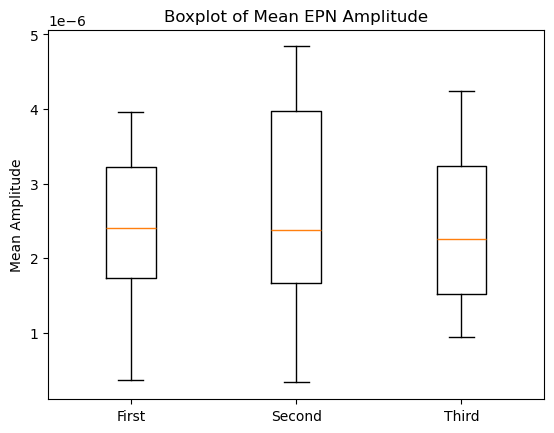

In [396]:
#stats test for EPN

from scipy import stats

# Paired t-test: first vs second
print("1st vs 2nd:", stats.ttest_rel(first_session, second_session))
# Paired t-test: first vs third
print("1st vs 3rd:", stats.ttest_rel(first_session, third_session))
# Paired t-test: second vs third
print("2nd vs 3rd:", stats.ttest_rel(second_session, third_session))


#boxplot
data = [first_session, second_session, third_session]
# Create a DataFrame

plt.boxplot(data, tick_labels=['First', 'Second', 'Third'])
plt.title('Boxplot of Mean EPN Amplitude')
plt.ylabel('Mean Amplitude')
plt.show();


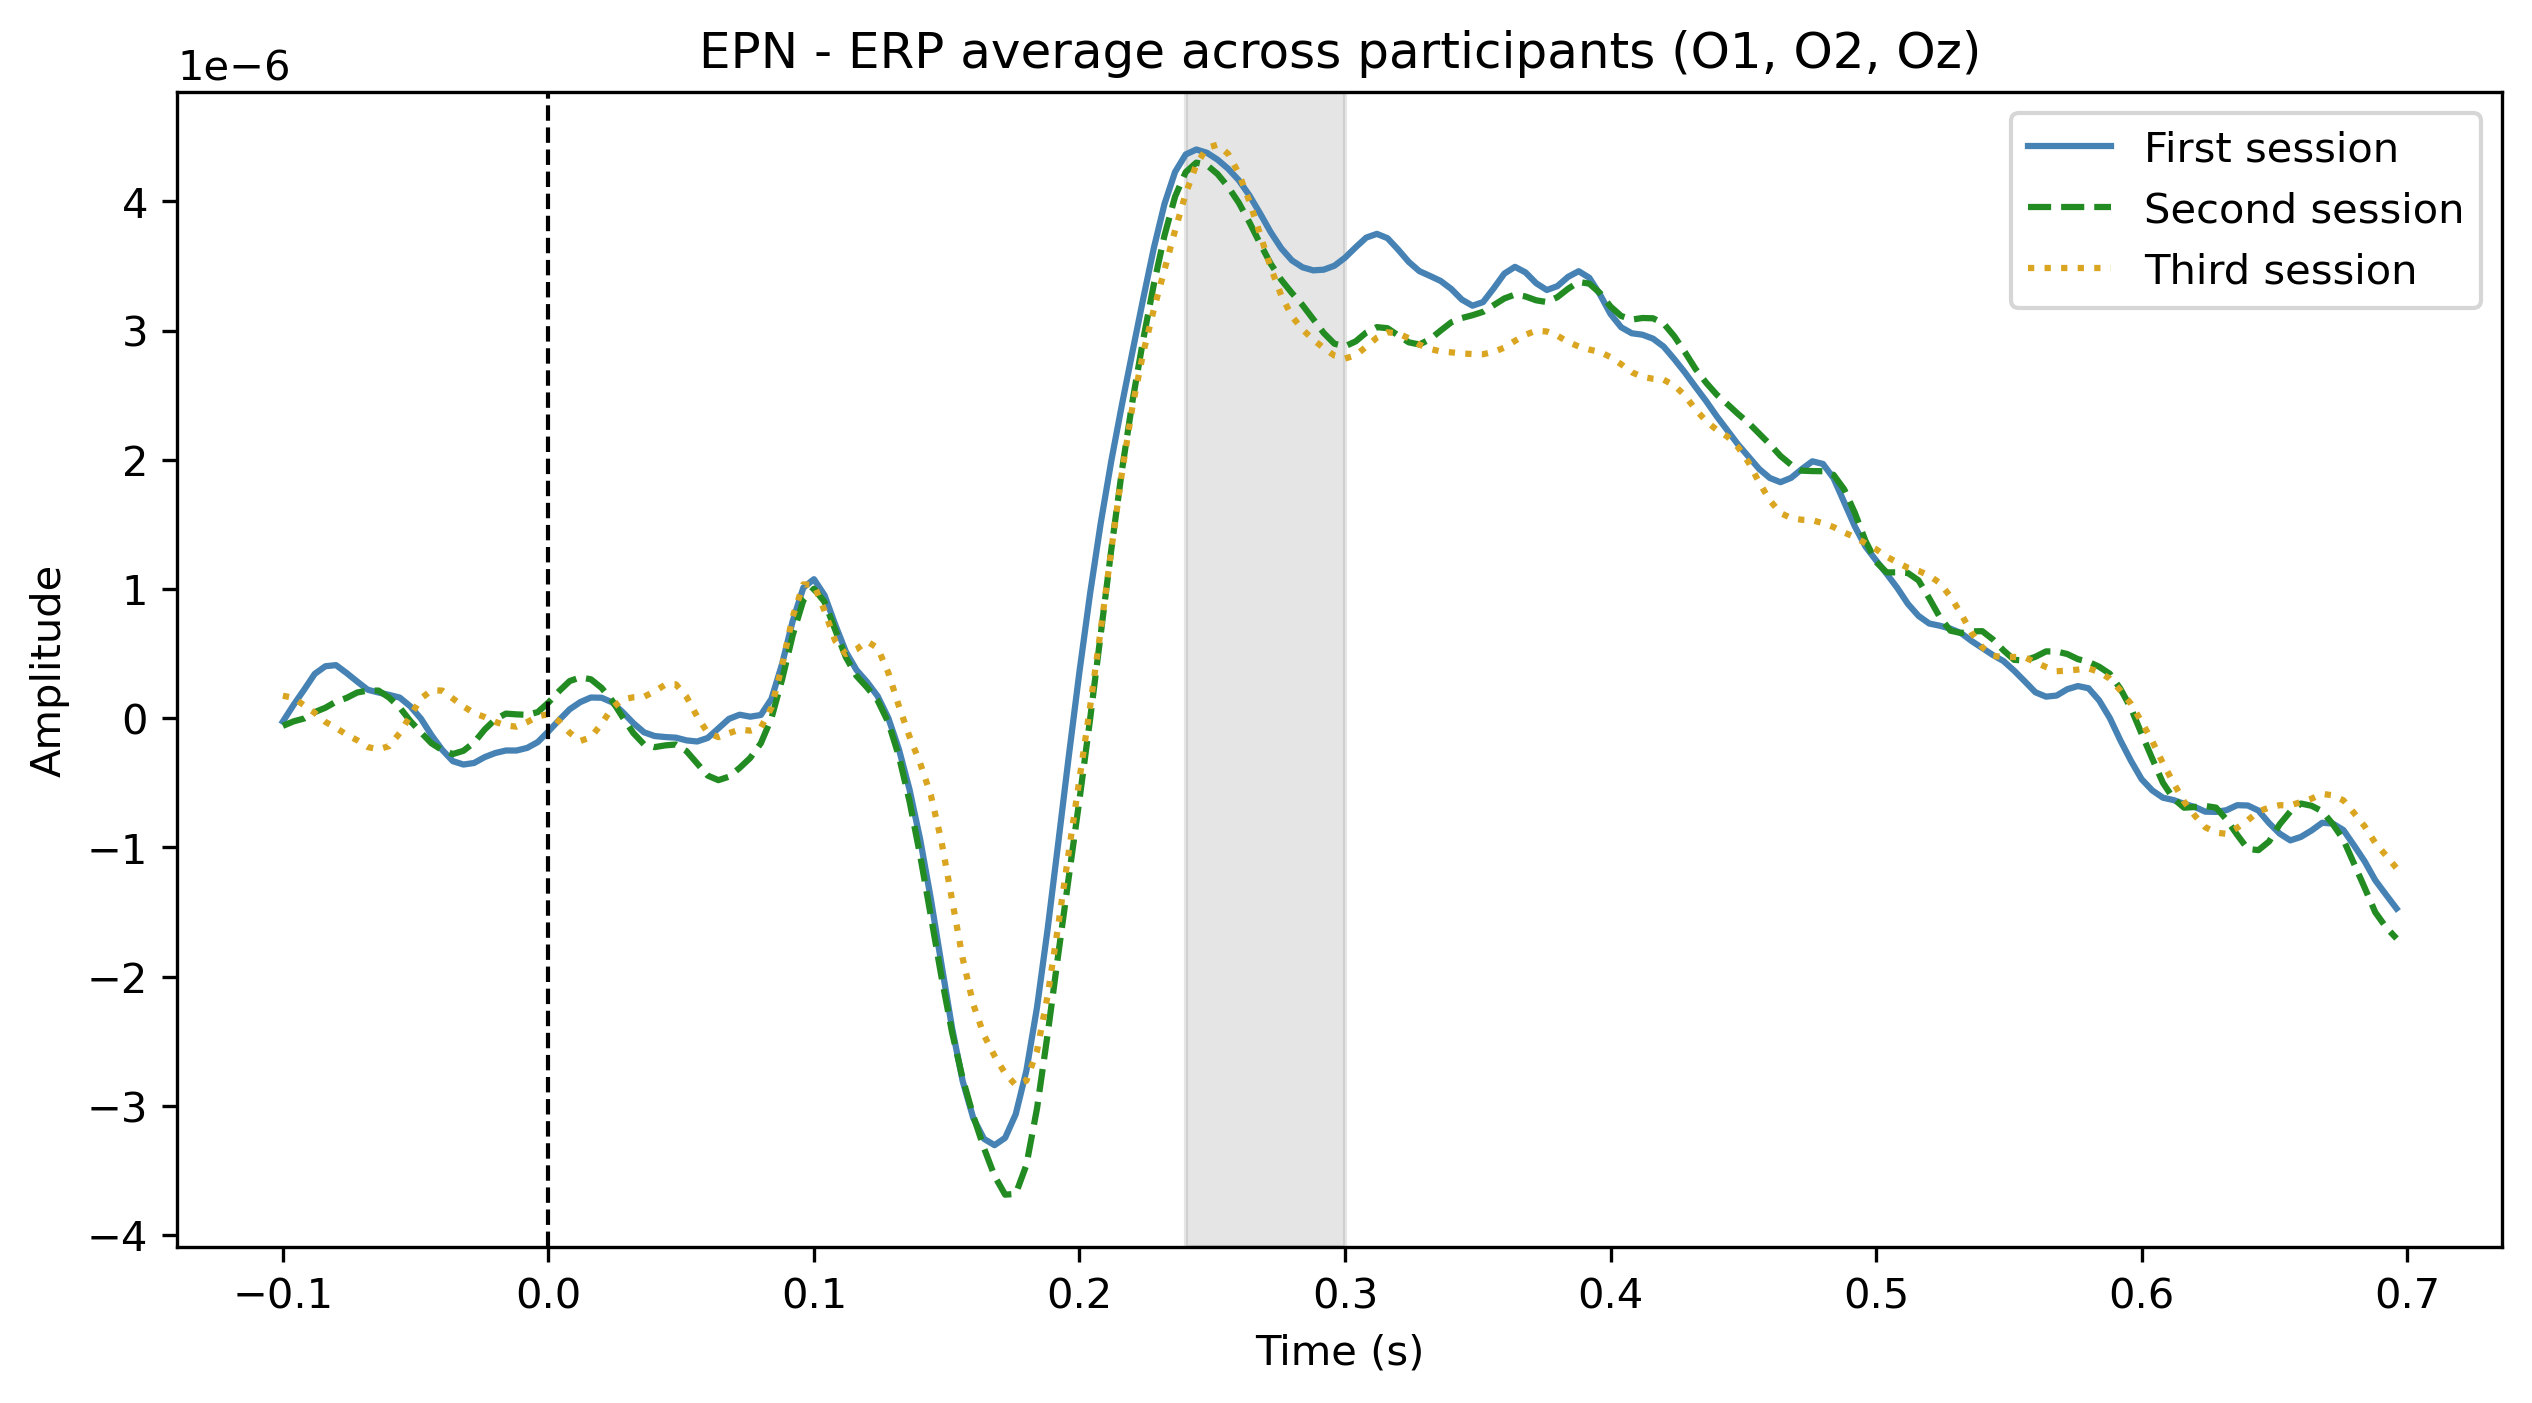

In [397]:
#prep to plot

# prep data for plotting

first_session_epn = np.array([])
second_session_epn = np.array ([])
third_session_epn = np.array([])

#slicing based on trials - each showing 60 images

for epochs in all_epochs:
    epochs_img = epochs["Image"]
    epochs1 = epochs_img[5:60]
    epochs2 = epochs_img[65:120]
    epochs3 = epochs_img[125:]

    data1 = epochs1.get_data(picks=picks)
    data2 = epochs2.get_data(picks=picks)
    data3 = epochs3.get_data(picks=picks)
    
    data1_mean = np.mean(data1, axis=(0, 1))
    data2_mean = np.mean(data2, axis=(0, 1))
    data3_mean = np.mean(data3, axis=(0, 1))

    # calculate the mean over the channel and trial dimension (axis 1 and 2)
    # we keep the time dimension (axis 0) to plot the time course
    first_session_epn = np.concatenate((first_session_epn, data1_mean), axis=0)
    second_session_epn = np.concatenate((second_session_epn, data2_mean), axis = 0)
    third_session_epn = np.concatenate((third_session_epn, data3_mean), axis = 0)

#reshape to participant, time
first_session_epn = first_session_epn.reshape(8, 200)
second_session_epn = second_session_epn.reshape(8, 200)
third_session_epn = third_session_epn.reshape(8, 200)

# averaging over participants
fig, ax = plt.subplots(1, figsize=(10, 5), dpi=300)

# plot the time window
ax.axvspan(tmin, tmax, color="grey", alpha=0.2)

ax.plot(times, first_session_epn.mean(axis=0), label="First session", linestyle="-", color=colours[0])
ax.plot(times, second_session_epn.mean(axis=0), label="Second session", linestyle="--", color=colours[1])
ax.plot(times, third_session_epn.mean(axis=0), label="Third session", linestyle=":", color=colours[2])

# vertical line at 0
ax.axvline(x=0, color="black", linestyle="--", linewidth=1)

ax.set(xlabel="Time (s)", ylabel="Amplitude", title="EPN - ERP average across participants (O1, O2, Oz)")
ax.legend()

#plt.savefig("erp_avg_EPN.png", format="png", dpi=300, bbox_inches="tight")

plt.show();

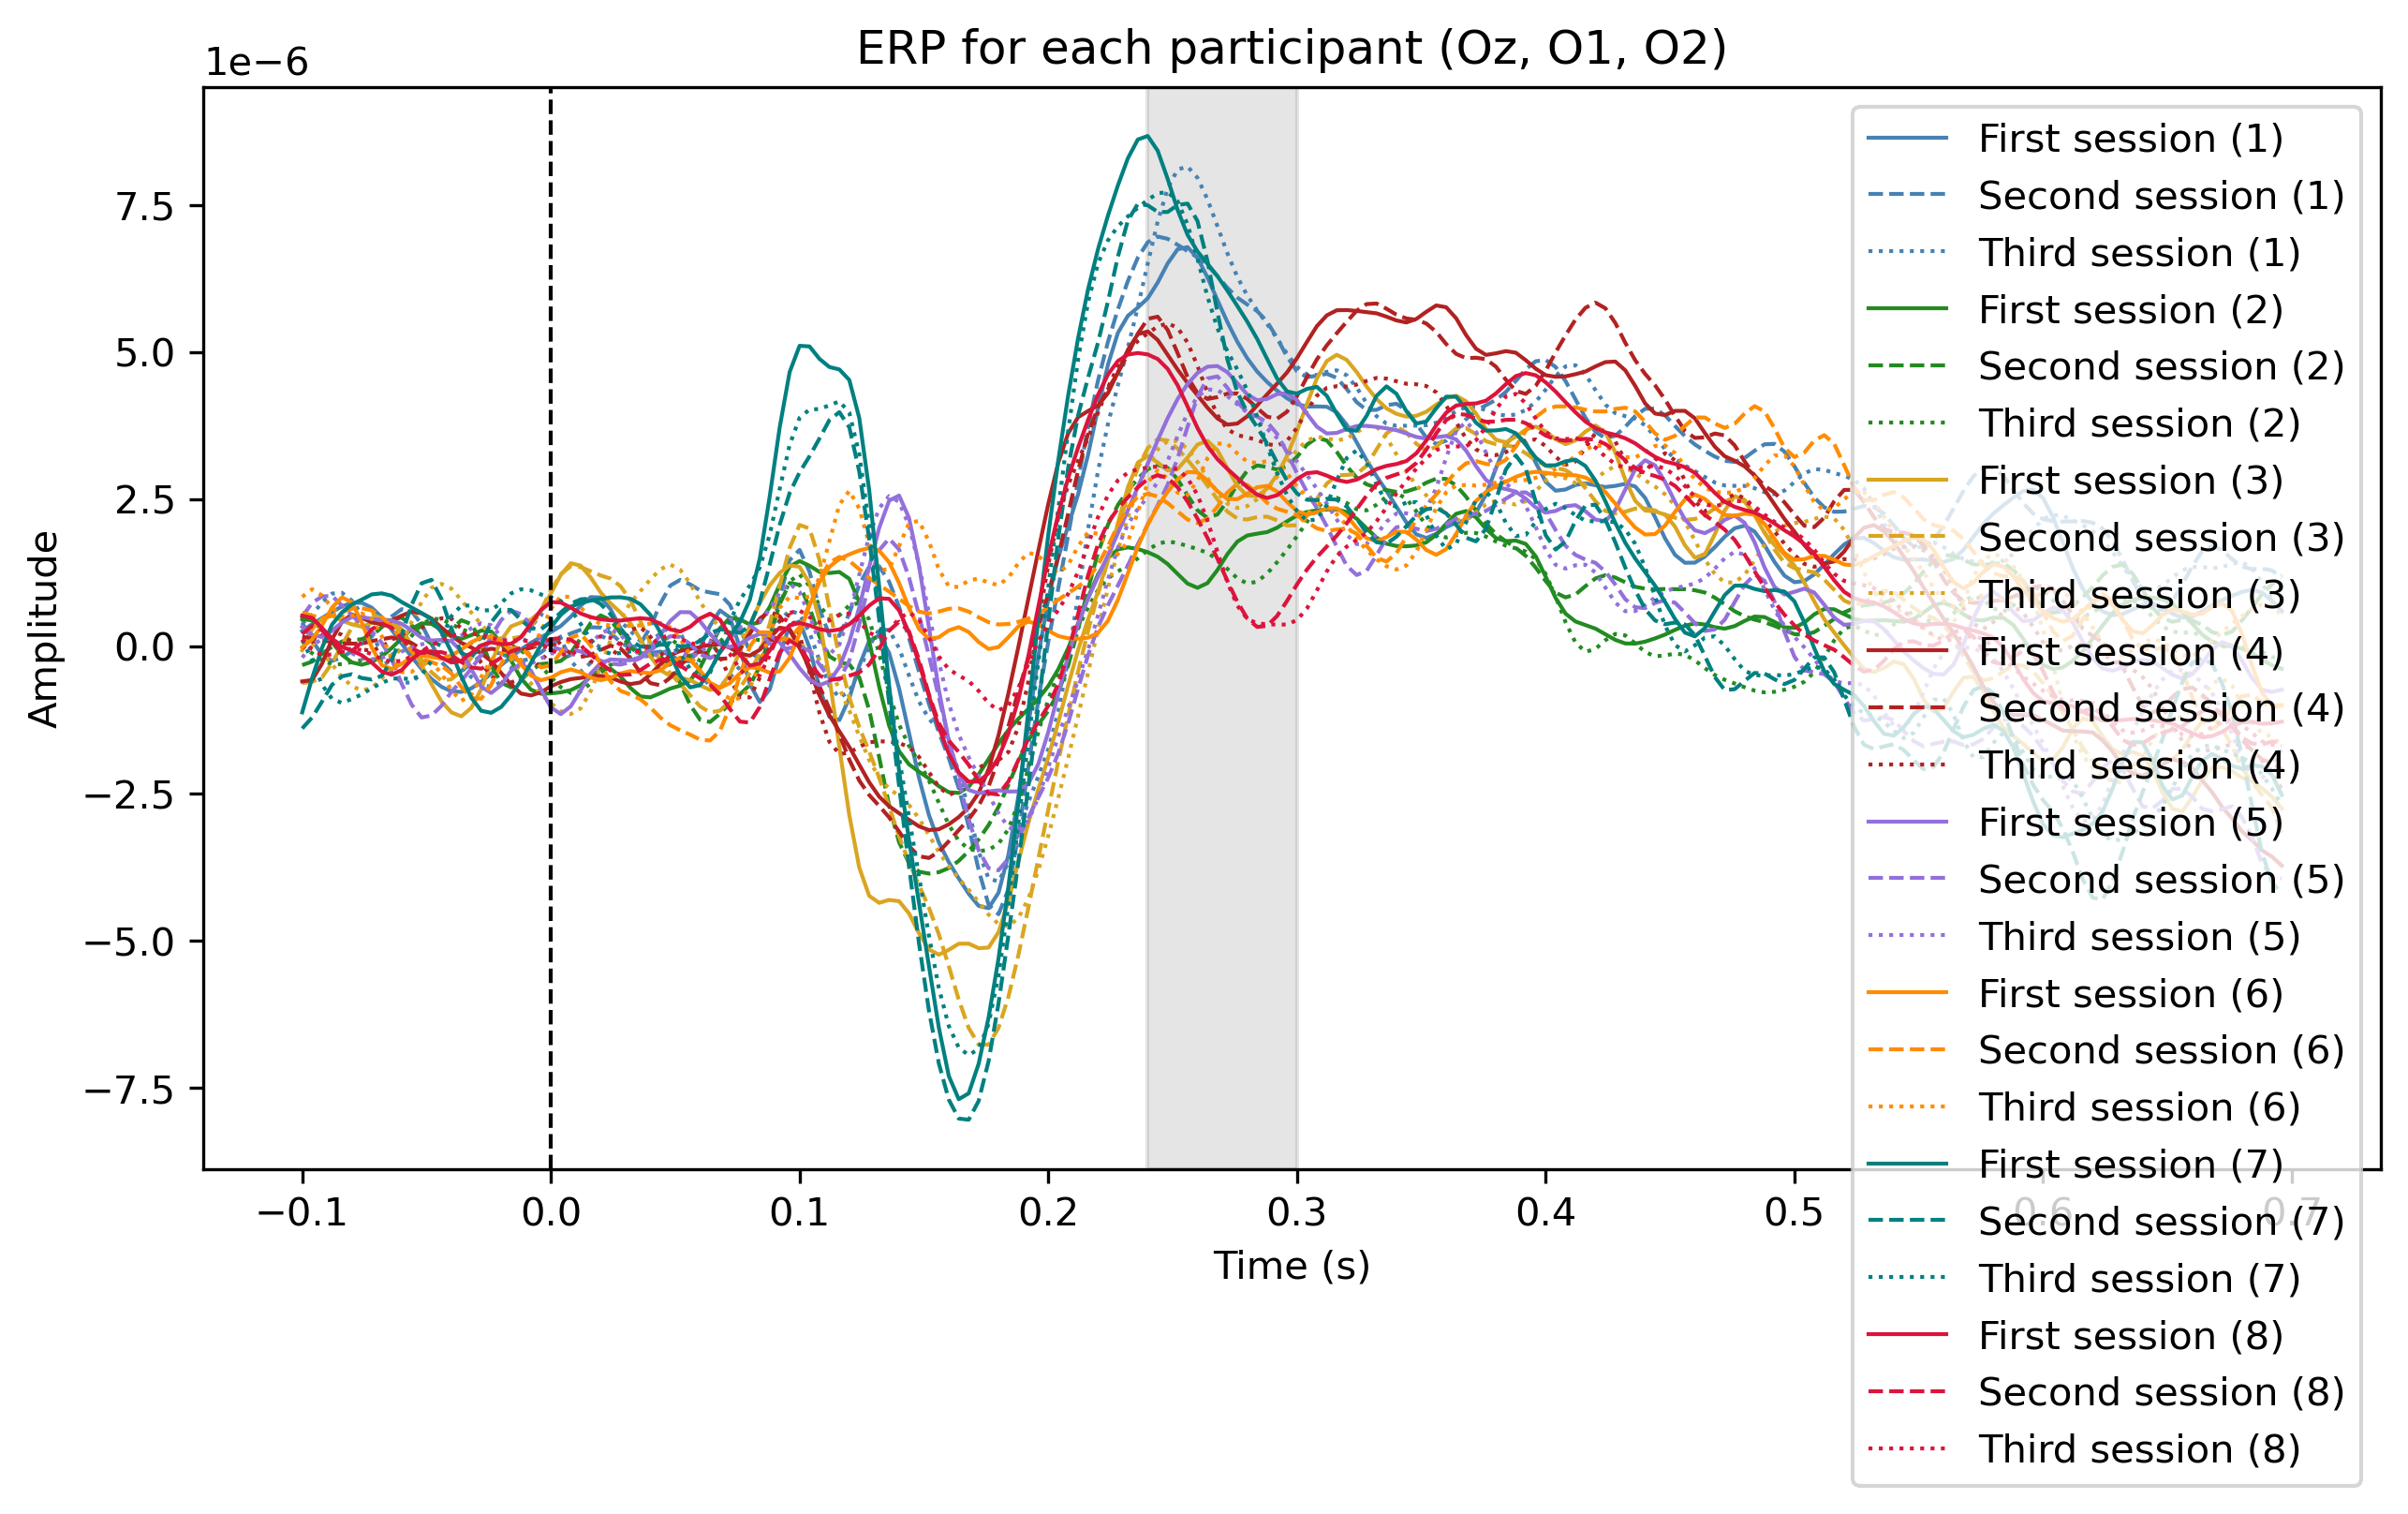

In [398]:
#for all paritipcant individually
times = all_epochs[0].times

fig, ax = plt.subplots(1, figsize=(10, 5), dpi=300)

# plot the time window
ax.axvspan(tmin, tmax, color="grey", alpha=0.2)

for participant in range(8):

    ax.plot(times, first_session_epn[participant, :], label=f"First session ({participant+1})", linestyle="-", color=colours[participant], linewidth=1)
    ax.plot(times, second_session_epn[participant, :], label=f"Second session ({participant+1})", linestyle="--", color=colours[participant], linewidth=1)
    ax.plot(times, third_session_epn[participant, :], label=f"Third session ({participant+1})", linestyle=":", color=colours[participant], linewidth=1)


# vertical line at 0
ax.axvline(x=0, color="black", linestyle="--", linewidth=1)

ax.set(xlabel="Time (s)", ylabel="Amplitude", title="ERP for each participant (Oz, O1, O2)")
ax.legend()

#plt.savefig("erp_participants.png", format="png", dpi=300, bbox_inches="tight")
plt.show();


In [384]:

picks = ["Oz", "P3", "P4"]
#time window
tmin = 0.24
tmax = 0.3

# load in the data
data_path = Path("FaceWord_EEG") 

# loading in the file with the bad channels identified by each group
session_info_path = data_path / "session_info.txt"

# load in session information (bad channels, etc.) txt file with dictionary
with open(session_info_path, "r") as f:
    session_info = eval(f.read())

df_list = []
for subj, epochs in zip(session_info.keys(), all_epochs):
    # --- find the time‐sample indices --------------
    times = epochs.times
    win_mask = (times >= tmin) & (times <= tmax)

    # --- get the data & compute LPP ---------------
    # shape = (n_epochs, n_channels, n_times)
    data = epochs.get_data(picks=picks)
    # mean over time, then over channels → (n_epochs,)
    epn_vals = data[:, :, win_mask].mean(axis=2).mean(axis=1) * 1e6  # in µV

    # --- pull out the trial‐by‐trial condition name
    inv_event_id = {v: k for k, v in epochs.event_id.items()}
    conds = [inv_event_id[code] for code in epochs.events[:, 2]]

    # --- build a per‐subject DataFrame --------------
    df_subj = pd.DataFrame({
        'Subject': subj,
        'Condition': conds,
        'EPN_240_300ms': epn_vals
    })

    df_list.append(df_subj)

# --- concatenate all subjects and write CSV -------
df_all = pd.concat(df_list, ignore_index=True)
df_all.to_csv('EPN_240_300.csv', index=False)
print("Saved → EPN_240_300.csv")

Saved → EPN_240_300.csv


# N400 Amplitudes:



In [399]:
# load in the data using the function

data_path = Path("epochs/final")

all_epochs = load_epochs(data_path, picks=["eeg"])

Reading /Users/rekaforgo/Downloads/epochs/final/group1_fw-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     696.00 ms
        0 CTF compensation matrices available
Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 0 columns
Reading /Users/rekaforgo/Downloads/epochs/final/group20_fw-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     696.00 ms
        0 CTF compensation matrices available
Not setting metadata
727 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 0 columns
Reading /Users/rekaforgo/Downloads/epochs/final/group9_fw-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     696.00 ms
        0 CTF compensation matrices available
Not setting metadata
739 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 0 columns
Reading /Users/rek

In [400]:
for epochs in all_epochs:
    print(len(epochs[["Image/wPos", "Image/wNeg"]]))

for epochs in all_epochs:
    print(len(epochs["Image/wNeu"]))


120
121
123
119
120
118
120
121
60
61
62
60
61
59
60
61


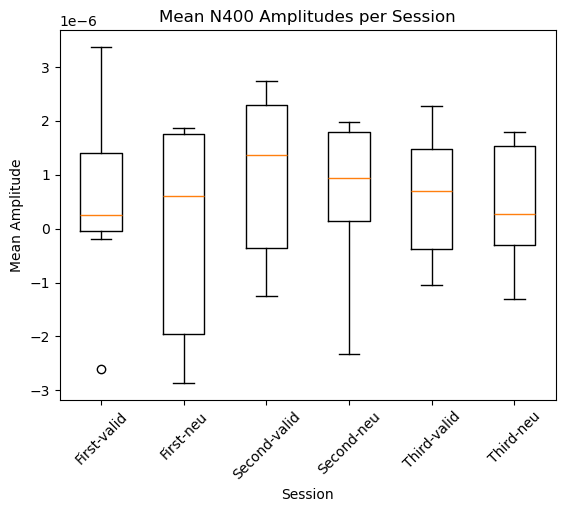

1st vs 2nd (valid): TtestResult(statistic=-0.9305396230613495, pvalue=0.38306187276767545, df=7)
1st vs 3rd (valid):  TtestResult(statistic=-0.12677626578523177, pvalue=0.9026822550401474, df=7)
2nd vs 3rd (valid): TtestResult(statistic=1.59734950239896, pvalue=0.1542193862926959, df=7)
1st vs 2nd (neutral): TtestResult(statistic=-1.9073641982295275, pvalue=0.09813734030751334, df=7)
1st vs 3rd (neutral): TtestResult(statistic=-1.1029779247985174, pvalue=0.30650643452365195, df=7)
2nd vs 3rd (neutral): TtestResult(statistic=0.6456085794113291, pvalue=0.5391113176388047, df=7)
1st vs 1st (valid - neutral): TtestResult(statistic=1.168137164904369, pvalue=0.28099240934837577, df=7)
2nd vs 2nd (valid - neutral): TtestResult(statistic=1.1285544314335212, pvalue=0.2962741747971991, df=7)
3rd vs 3rd (valid-neutral): TtestResult(statistic=1.120466335516317, pvalue=0.29947932837860236, df=7)


In [402]:
#prep data

picks = ["Cz", "C3", "C4"]
#time window
tmin, tmax = 0.30, 0.45

first_session_valid = np.array([])
second_session_valid =np.array([])
third_session_valid =np.array([])

first_session_neu =np.array([])
second_session_neu =np.array([])
third_session_neu =np.array([])


for epochs in all_epochs:
    epochs_valid = epochs[["Image/wPos", "Image/wNeg"]]
    epochs_neu = epochs["Image/wNeu"]

    epochs1_valid = epochs_valid[5:40]    
    epochs2_valid = epochs_valid[45:80] 
    epochs3_valid = epochs_valid[85:] 

    epochs1_neu = epochs_neu[5:20]    
    epochs2_neu = epochs_neu[25:40] 
    epochs3_neu = epochs_neu[40:] 

    # Compute mean amplitude for first block (or NaN if missing)
    data1_valid = epochs1_valid.get_data(picks=picks, tmin=tmin, tmax=tmax)
    data2_valid = epochs2_valid.get_data(picks=picks, tmin=tmin, tmax=tmax)
    data3_valid = epochs3_valid.get_data(picks=picks, tmin=tmin, tmax=tmax)

    data1_valid_mean = np.mean(data1_valid, axis=(0, 1, 2))
    data2_valid_mean = np.mean(data2_valid, axis=(0, 1, 2))
    data3_valid_mean = np.mean(data3_valid, axis=(0, 1, 2))


    first_session_valid = np.append(first_session_valid, data1_valid_mean)
    second_session_valid = np.append(second_session_valid, data2_valid_mean)
    third_session_valid = np.append(third_session_valid, data3_valid_mean)

    data1_neu = epochs1_neu.get_data(picks=picks, tmin=tmin, tmax=tmax)
    data2_neu = epochs2_neu.get_data(picks=picks, tmin=tmin, tmax=tmax)
    data3_neu = epochs3_neu.get_data(picks=picks, tmin=tmin, tmax=tmax)

    data2_neu_mean = np.mean(data2_neu, axis=(0, 1, 2))
    data3_neu_mean = np.mean(data3_neu, axis=(0, 1, 2))
    data1_neu_mean = np.mean(data1_neu, axis=(0, 1, 2))

    first_session_neu = np.append(first_session_neu, data1_neu_mean)
    second_session_neu = np.append(second_session_neu, data2_neu_mean)
    third_session_neu = np.append(third_session_neu, data3_neu_mean)

#stats
# Organize the data
data = [first_session_valid, first_session_neu, second_session_valid, second_session_neu, third_session_valid, third_session_neu]

# Create the boxplot
plt.boxplot(data, tick_labels=["First-valid", "First-neu", "Second-valid","Second-neu", "Third-valid", "Third-neu"])
plt.xticks(rotation=45)
plt.xlabel("Session")
plt.ylabel("Mean Amplitude")
plt.title("Mean N400 Amplitudes per Session")
plt.show()

#paired t-tests

# Paired t-test: first vs second
print("1st vs 2nd (valid):", stats.ttest_rel(first_session_valid, second_session_valid))
# Paired t-test: first vs third
print("1st vs 3rd (valid): ", stats.ttest_rel(first_session_valid, third_session_valid))
# Paired t-test: second vs third
print("2nd vs 3rd (valid):", stats.ttest_rel(second_session_valid, third_session_valid))
# Paired t-test: first vs second
print("1st vs 2nd (neutral):", stats.ttest_rel(first_session_neu, second_session_neu))
# Paired t-test: first vs third
print("1st vs 3rd (neutral):", stats.ttest_rel(first_session_neu, third_session_neu))
# Paired t-test: second vs third
print("2nd vs 3rd (neutral):", stats.ttest_rel(second_session_neu, third_session_neu))
# Paired t-test: first vs firts
print('1st vs 1st (valid - neutral):', stats.ttest_rel(first_session_valid, first_session_neu))
print('2nd vs 2nd (valid - neutral):', stats.ttest_rel(second_session_valid, second_session_neu))
print('3rd vs 3rd (valid-neutral):', stats.ttest_rel(third_session_valid, third_session_neu))

In [403]:
#prep data for plotting.

picks = ["Cz", "C3", "C4"]
#time window
tmin, tmax = 0.30, 0.45

# prep data for plotting

first_session_valid = np.array([])
second_session_valid = np.array([])
third_session_valid = np.array([])

first_session_neu = np.array([])
second_session_neu = np.array([])
third_session_neu = np.array([])

# slicing based on trials - each showing 60 images
for epochs in all_epochs:
    epochs_valid = epochs[["Image/wPos", "Image/wNeg"]]  # combine valid
    epochs_neu = epochs["Image/wNeu"]                    # neutral

    # Correct slicing for valid
    epochs1_valid = epochs_valid[5:40]
    epochs2_valid = epochs_valid[45:80]
    epochs3_valid = epochs_valid[85:]

    # Correct slicing for neutral
    epochs1_neu = epochs_neu[5:20]
    epochs2_neu = epochs_neu[25:40]
    epochs3_neu = epochs_neu[40:]

    # Get data
    data1_valid = epochs1_valid.get_data(picks=picks)
    data2_valid = epochs2_valid.get_data(picks=picks)
    data3_valid = epochs3_valid.get_data(picks=picks)

    data1_neu = epochs1_neu.get_data(picks=picks)
    data2_neu = epochs2_neu.get_data(picks=picks)
    data3_neu = epochs3_neu.get_data(picks=picks)

    # Compute mean across channels and trials (keep time dimension)
    data1_valid_mean = np.mean(data1_valid, axis=(0, 1))  # (time,)
    data2_valid_mean = np.mean(data2_valid, axis=(0, 1))
    data3_valid_mean = np.mean(data3_valid, axis=(0, 1))

    data1_neu_mean = np.mean(data1_neu, axis=(0, 1))
    data2_neu_mean = np.mean(data2_neu, axis=(0, 1))
    data3_neu_mean = np.mean(data3_neu, axis=(0, 1))

    # Concatenate (grow arrays)
    first_session_valid = np.concatenate((first_session_valid, data1_valid_mean), axis=0)
    second_session_valid = np.concatenate((second_session_valid, data2_valid_mean), axis=0)
    third_session_valid = np.concatenate((third_session_valid, data3_valid_mean), axis=0)

    first_session_neu = np.concatenate((first_session_neu, data1_neu_mean), axis=0)
    second_session_neu = np.concatenate((second_session_neu, data2_neu_mean), axis=0)
    third_session_neu = np.concatenate((third_session_neu, data3_neu_mean), axis=0)

# reshape to (participants, time)
first_session_valid = first_session_valid.reshape(8, 200)
second_session_valid = second_session_valid.reshape(8, 200)
third_session_valid = third_session_valid.reshape(8, 200)

first_session_neu = first_session_neu.reshape(8, 200)
second_session_neu = second_session_neu.reshape(8, 200)
third_session_neu = third_session_neu.reshape(8, 200)

# Print the shapes to verify
print(first_session_valid.shape)
print(second_session_valid.shape)
print(third_session_valid.shape)

print(first_session_neu.shape)
print(second_session_neu.shape)
print(third_session_neu.shape)


(8, 200)
(8, 200)
(8, 200)
(8, 200)
(8, 200)
(8, 200)


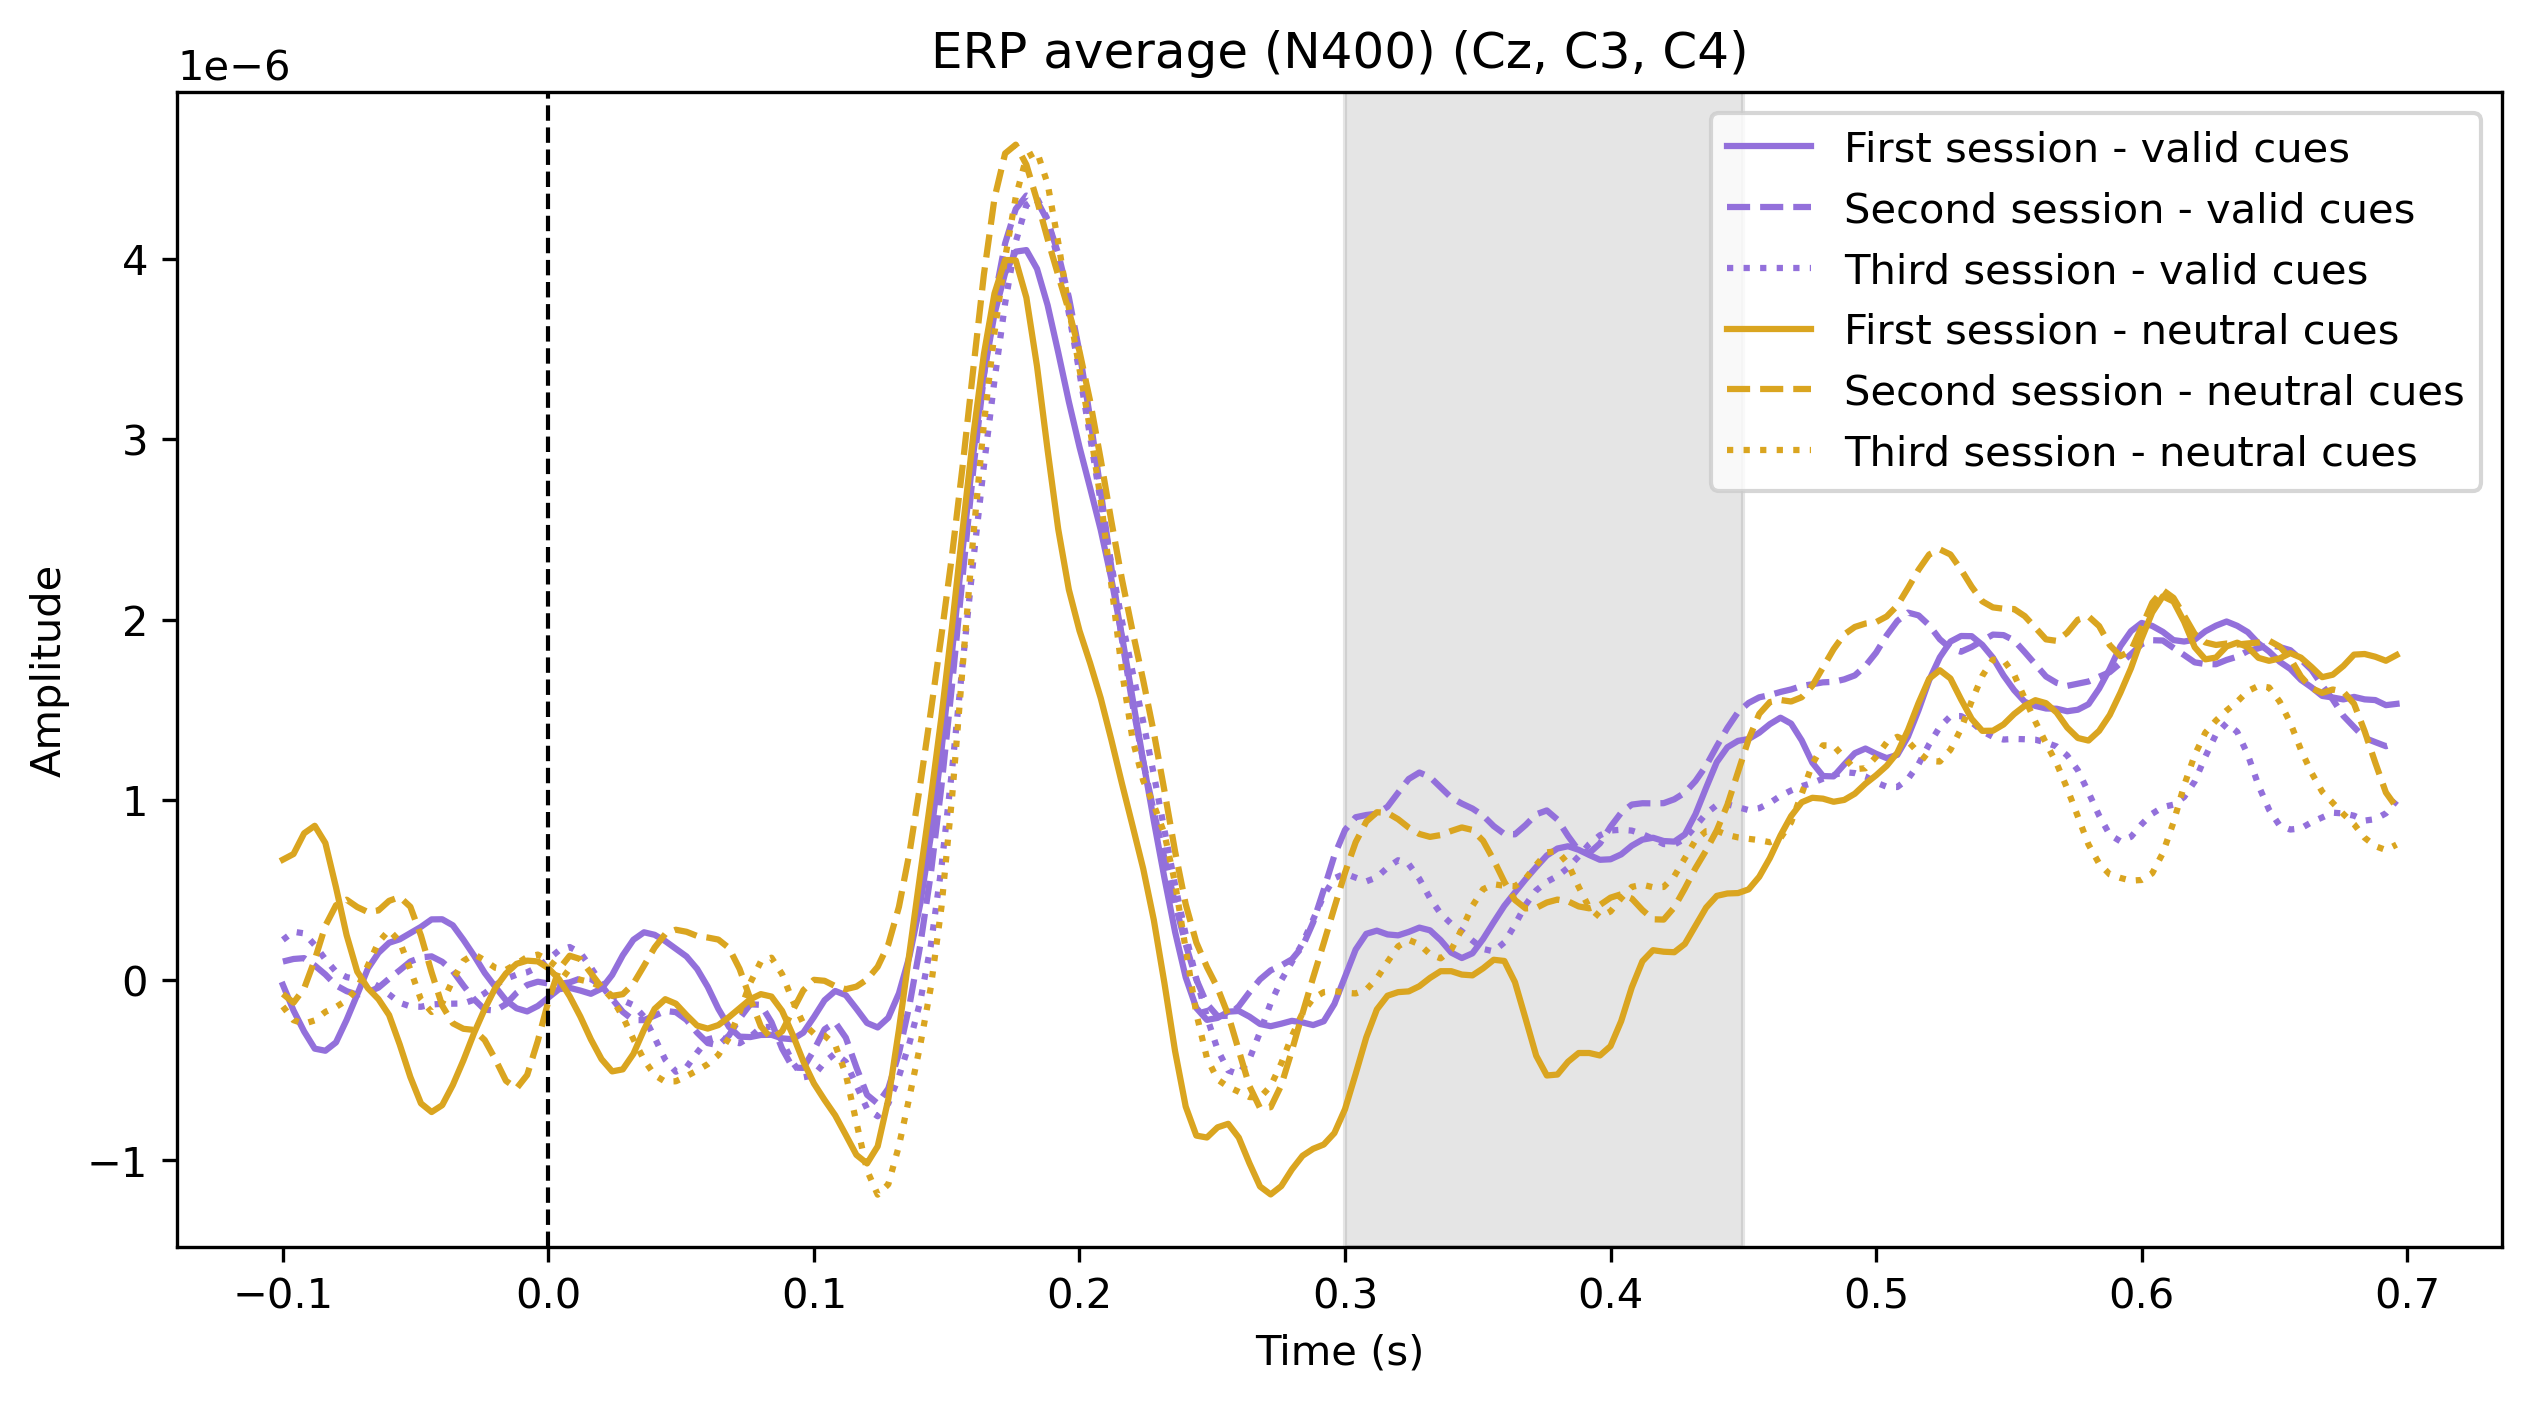

In [ ]:
#plot

fig, ax = plt.subplots(1, figsize=(10, 5), dpi=300)

# plot the time window
ax.axvspan(tmin, tmax, color="grey", alpha=0.2)


ax.plot(times, first_session_valid.mean(axis=0), label="First session - valid cues", linestyle="-", color=colours[4])
ax.plot(times, second_session_valid.mean(axis=0), label="Second session - valid cues", linestyle="--", color=colours[4])
ax.plot(times, third_session_valid.mean(axis=0), label="Third session - valid cues", linestyle=":", color=colours[4])


ax.plot(times, first_session_neu.mean(axis=0), label="First session - neutral cues", linestyle="-", color=colours[2])
ax.plot(times, second_session_neu.mean(axis=0), label="Second session - neutral cues", linestyle="--", color=colours[2])
ax.plot(times, third_session_neu.mean(axis=0), label="Third session - neutral cues", linestyle=":", color=colours[2])


# vertical line at 0
ax.axvline(x=0, color="black", linestyle="--", linewidth=1)

ax.set(xlabel="Time (s)", ylabel="Amplitude", title="ERP average (N400) (Cz, C3, C4)")
ax.legend()

plt.savefig("erp_avg_N400_valid and invalid.png", format="png", dpi=300, bbox_inches="tight")

plt.show();

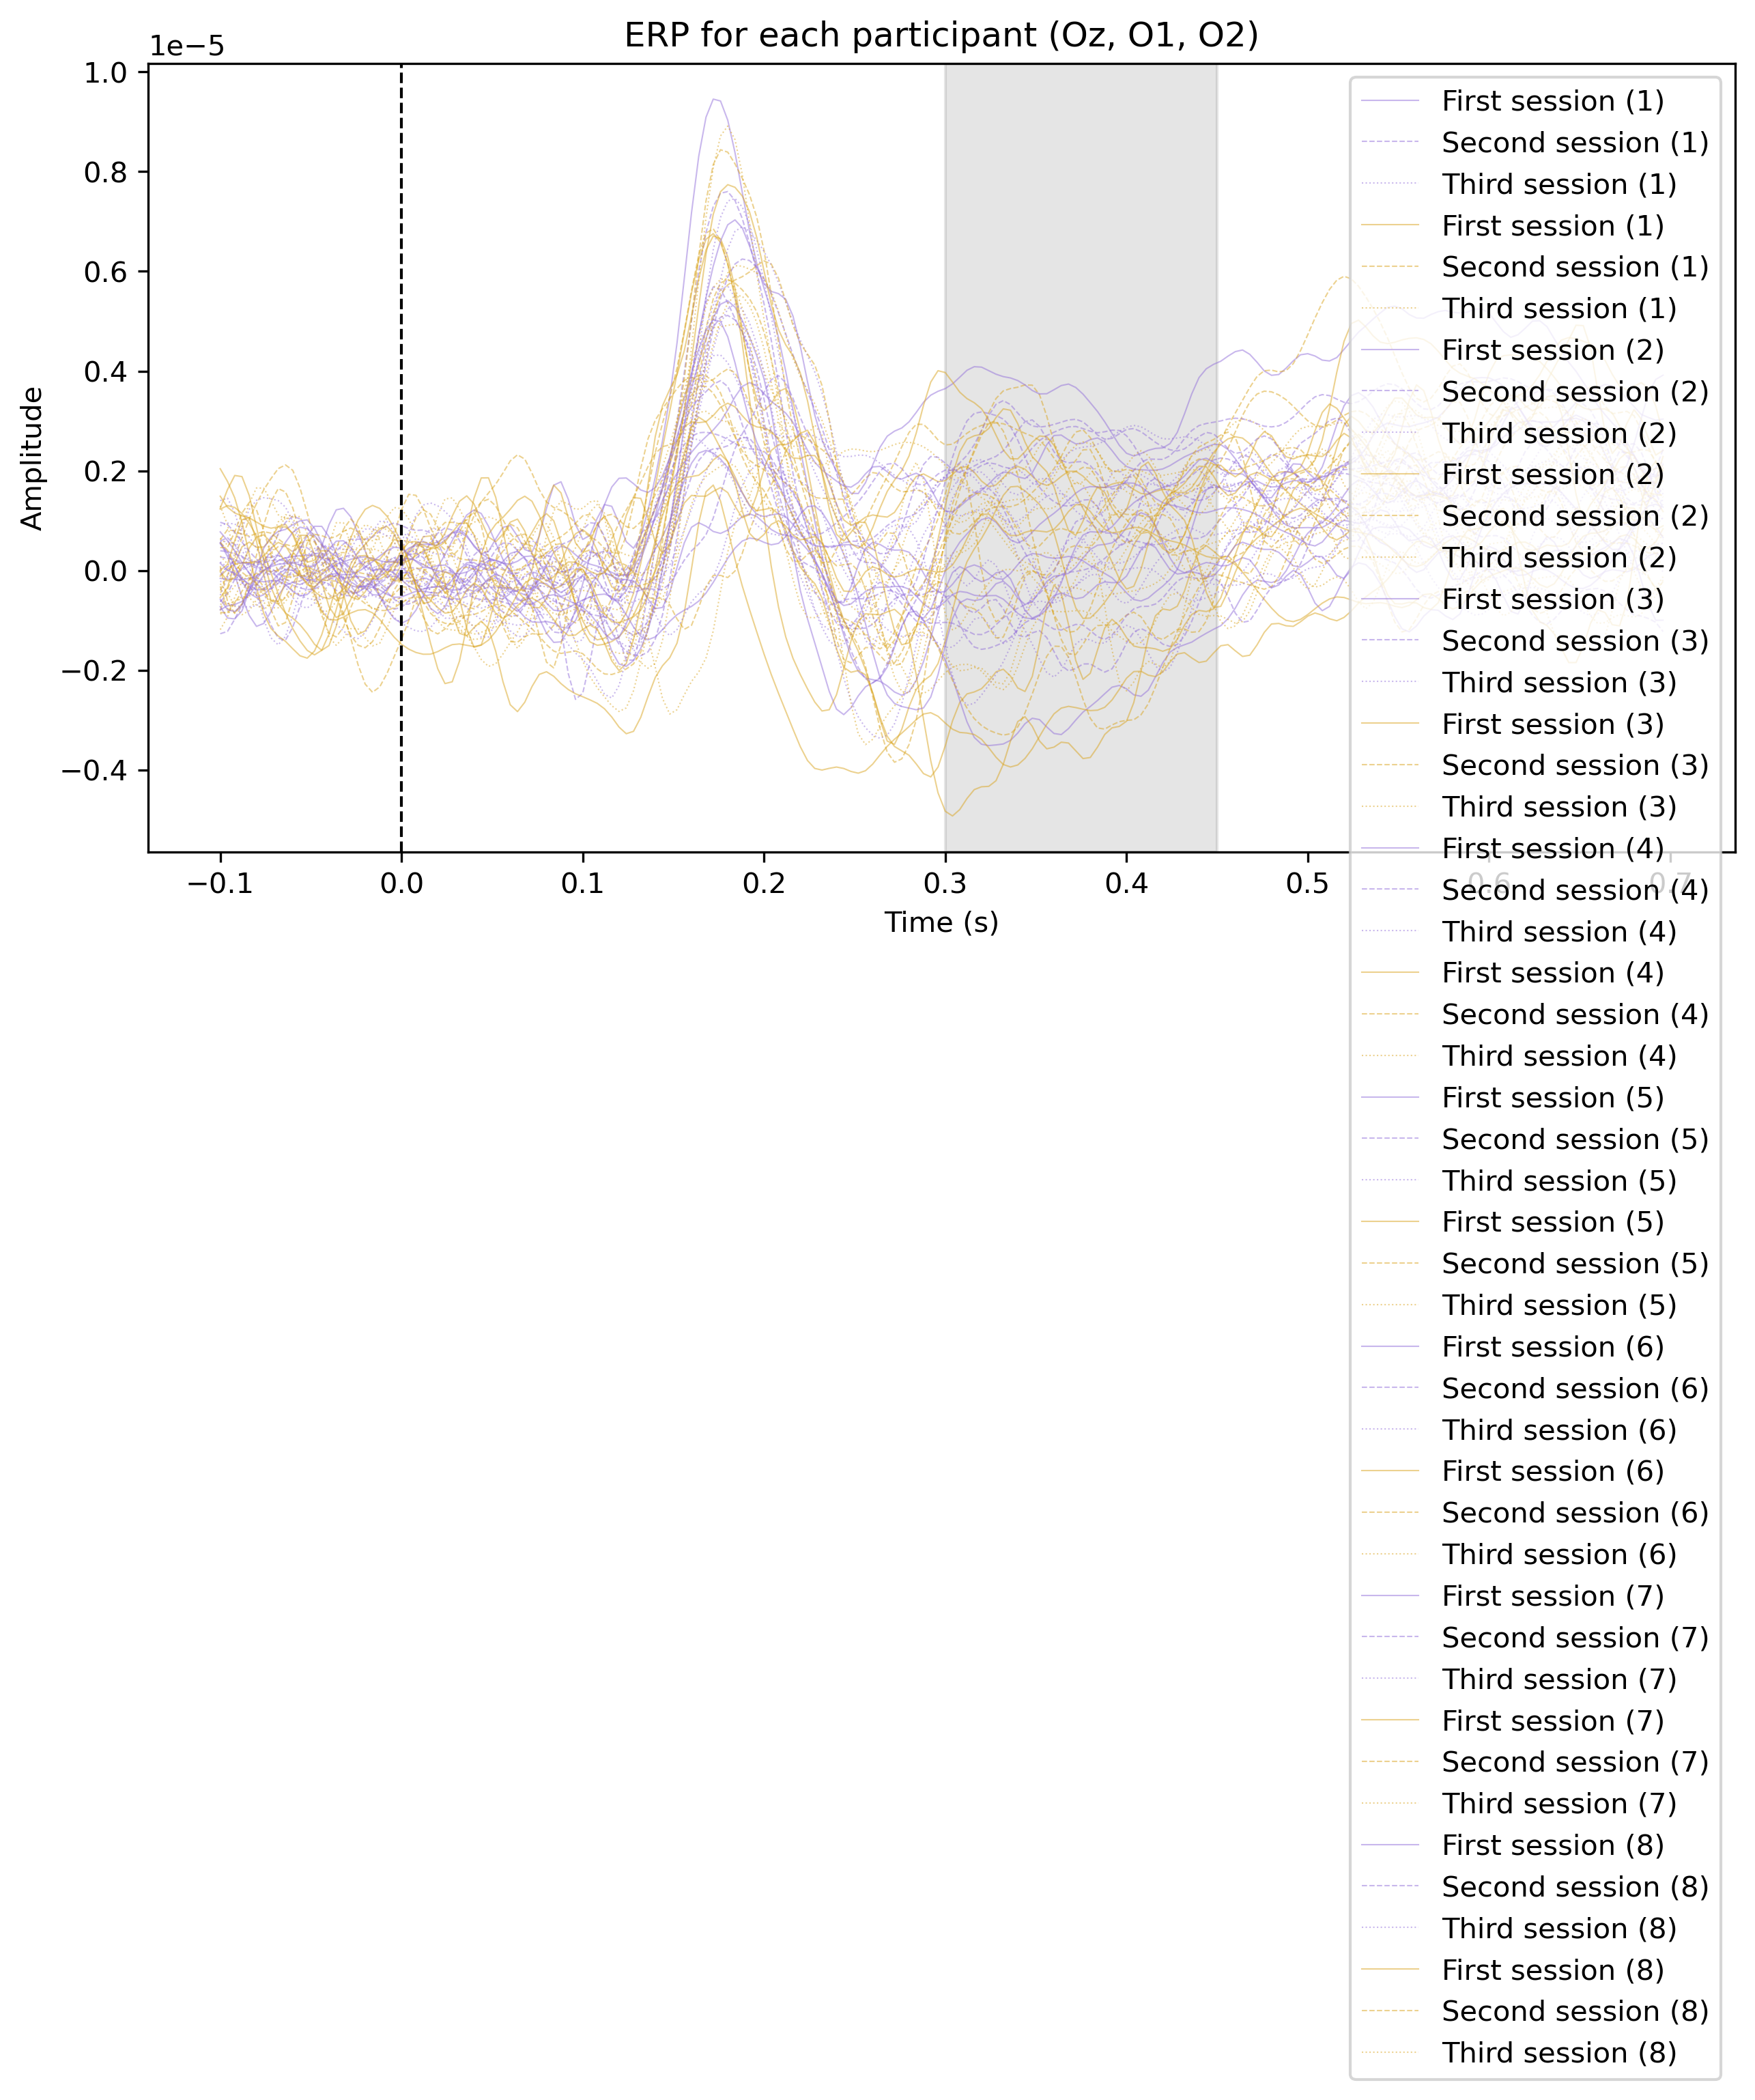

In [414]:
#for all paritipcant individually
times = all_epochs[0].times

fig, ax = plt.subplots(1, figsize=(10, 5), dpi=300)

# plot the time window
ax.axvspan(tmin, tmax, color="grey", alpha=0.2)

for participant in range(8):

    ax.plot(times, first_session_valid[participant, :], label=f"First session ({participant+1})", linestyle="-", color=colours[4], linewidth=0.5, alpha=0.5)
    ax.plot(times, second_session_valid[participant, :], label=f"Second session ({participant+1})", linestyle="--", color=colours[4], linewidth=0.5, alpha=0.5)
    ax.plot(times, third_session_valid[participant, :], label=f"Third session ({participant+1})", linestyle=":", color=colours[4], linewidth=0.5, alpha=0.5)

    ax.plot(times, first_session_neu[participant, :], label=f"First session ({participant+1})", linestyle="-", color=colours[2], linewidth=0.5, alpha=0.5)
    ax.plot(times, second_session_neu[participant, :], label=f"Second session ({participant+1})", linestyle="--", color=colours[2], linewidth=0.5, alpha=0.5)
    ax.plot(times, third_session_neu[participant, :], label=f"Third session ({participant+1})", linestyle=":", color=colours[2], linewidth=0.5, alpha=0.5)


#create means over conditions and only plot difference between valid or invalid for each participant, one line for each session.capitalize


# vertical line at 0
ax.axvline(x=0, color="black", linestyle="--", linewidth=1)

ax.set(xlabel="Time (s)", ylabel="Amplitude", title="ERP for each participant (Oz, O1, O2)")
ax.legend()

#plt.savefig("erp_participants.png", format="png", dpi=300, bbox_inches="tight")
plt.show();


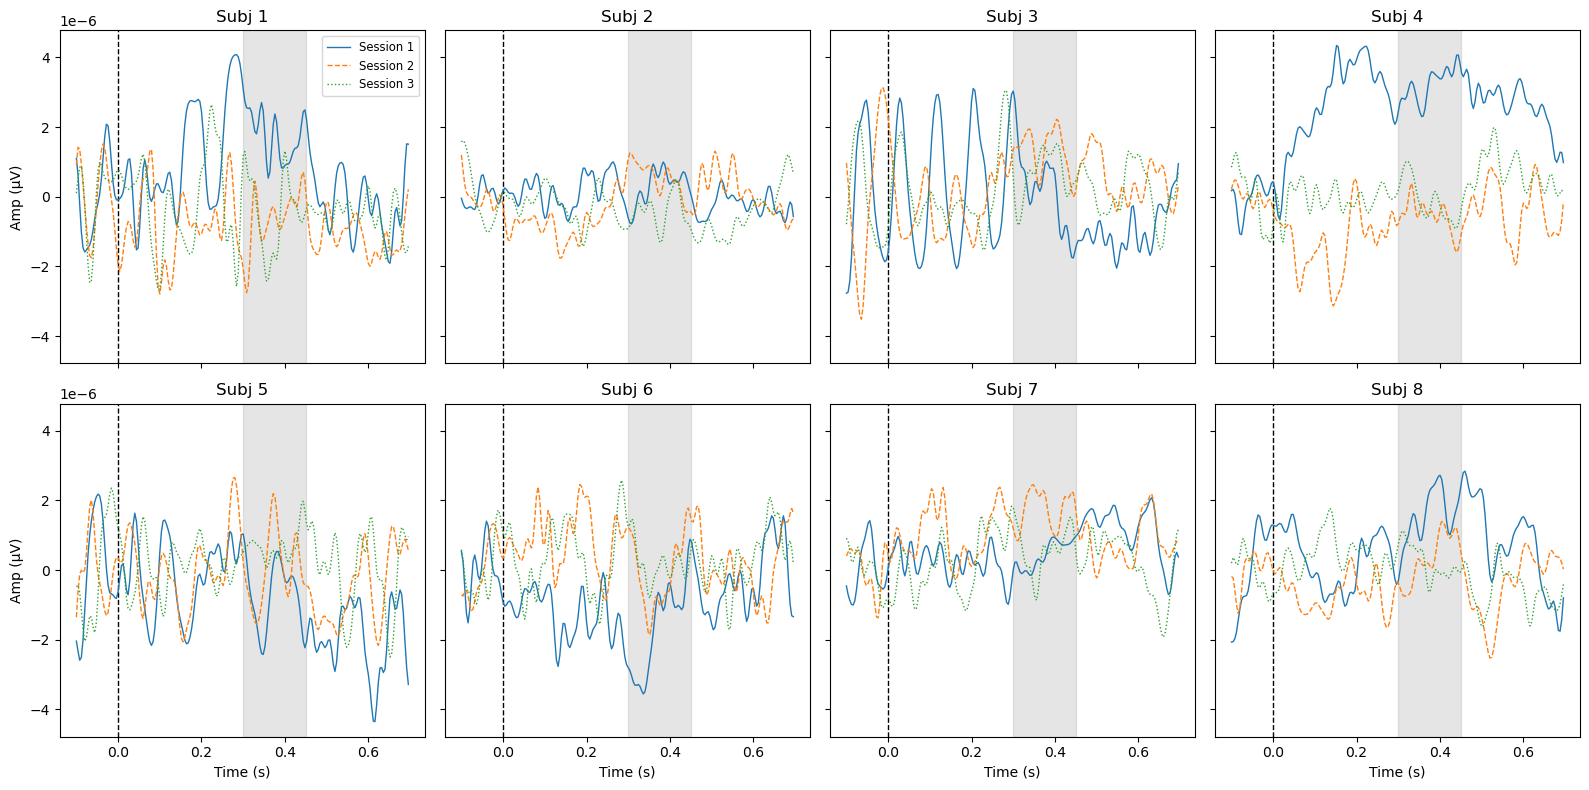

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

first_diff  = first_session_valid  - first_session_neu
second_diff = second_session_valid - second_session_neu
third_diff  = third_session_valid  - third_session_neu

# plotting
n_subj = first_diff.shape[0]
fig, axes = plt.subplots(2, 4, figsize=(16, 8), dpi=100, sharex=True, sharey=True)
axes = axes.ravel()
for subj in range(n_subj):
    ax = axes[subj]
    # highlight window
    ax.axvspan(tmin, tmax, color="grey", alpha=0.2)
    ax.axvline(0, color="black", linestyle="--", linewidth=1)
    # 3 session lines
    ax.plot(times, first_diff[subj],  label="Session 1", linestyle="-",  linewidth=1)
    ax.plot(times, second_diff[subj], label="Session 2", linestyle="--", linewidth=1)
    ax.plot(times, third_diff[subj],  label="Session 3", linestyle=":",  linewidth=1)
    ax.set_title(f"Subj {subj+1}")
    if subj % 4 == 0:
        ax.set_ylabel("Amp (µV)")
    if subj >= 4:
        ax.set_xlabel("Time (s)")
    if subj == 0:
        ax.legend(loc="upper right", fontsize="small")

plt.tight_layout()
plt.show()


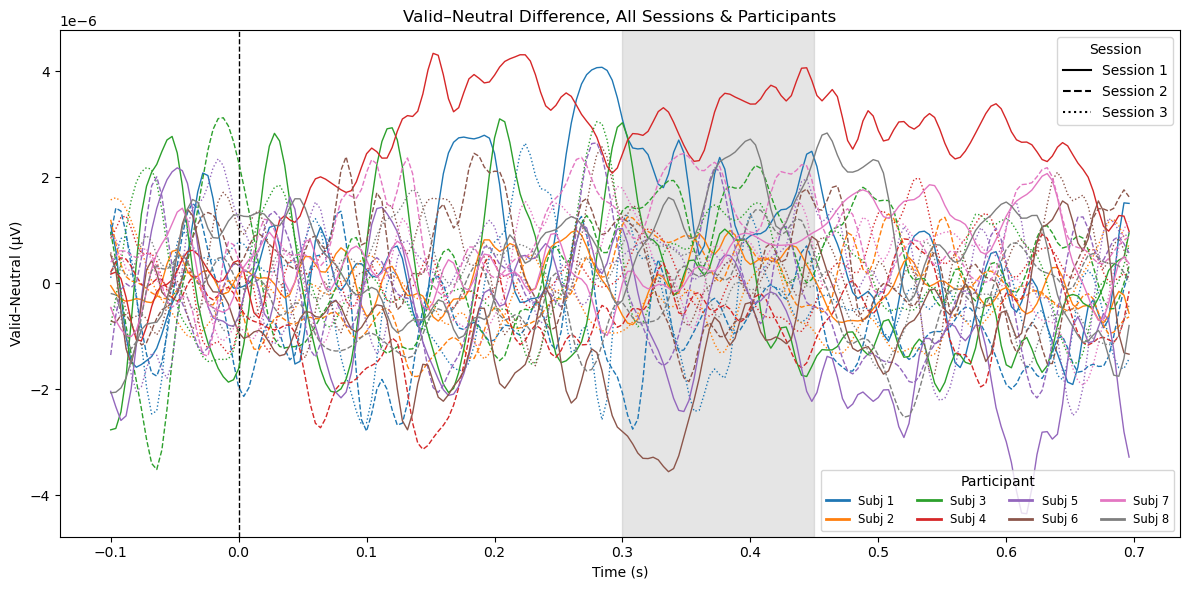

In [417]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# assume first_diff, second_diff, third_diff are (n_subj × n_times) arrays
n_subj = first_diff.shape[0]
styles = ['-', '--', ':']  # session 1, 2, 3
times = all_epochs[0].times

# pick a colormap with enough distinct colors
cmap = plt.get_cmap('tab10') if n_subj <= 10 else plt.get_cmap('tab20')

fig, ax = plt.subplots(figsize=(12, 6), dpi=100)

# highlight analysis window
ax.axvspan(tmin, tmax, color='grey', alpha=0.2)
ax.axvline(0, color='black', linestyle='--', linewidth=1)

# plot each participant × session
for subj in range(n_subj):
    color = cmap(subj)
    ax.plot(times, first_diff[subj],  linestyle=styles[0], color=color, linewidth=1 )
    ax.plot(times, second_diff[subj], linestyle=styles[1], color=color, linewidth=1)
    ax.plot(times, third_diff[subj],  linestyle=styles[2], color=color, linewidth=1)

# create custom legends
# Session legend
session_handles = [
    Line2D([0], [0], color='black', linestyle=styles[i], label=f'Session {i+1}')
    for i in range(3)
]
leg1 = ax.legend(handles=session_handles, title='Session', loc='upper right')

# Participant legend (show only colors)
participant_handles = [
    Line2D([0], [0], color=cmap(i), lw=2, label=f'Subj {i+1}')
    for i in range(n_subj)
]
leg2 = ax.legend(handles=participant_handles, title='Participant', ncol=4, loc='lower right', fontsize='small')
ax.add_artist(leg1)

ax.set(xlabel='Time (s)', ylabel='Valid–Neutral (µV)', title='Valid–Neutral Difference, All Sessions & Participants')
plt.tight_layout()
plt.show()


Identifying common channels ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Dropped the following channels:
['F7', 'F8', 'T7', 'Fp1', 'T8', 'FC1', 'Fp2', 'F3']


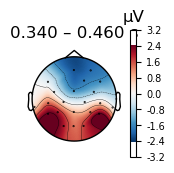

In [390]:
# collect Evokeds for Image only
image_evokeds = [epochs['Word'].average() for epochs in all_epochs]
grand = mne.grand_average(image_evokeds)

# one group-level topomap
grand.plot_topomap(
    times=0.4,
    average=0.125,
    ch_type='eeg',
    time_unit='s',
    show=True
    
    
);

In [391]:
# export to CSV


picks = ["Cz", "C3", "C4"]
#time window
tmin = 0.3
tmax = 0.45

# load in the data
data_path = Path("FaceWord_EEG") 

# loading in the file with the bad channels identified by each group
session_info_path = data_path / "session_info.txt"

# load in session information (bad channels, etc.) txt file with dictionary
with open(session_info_path, "r") as f:
    session_info = eval(f.read())

df_list = []
for subj, epochs in zip(session_info.keys(), all_epochs):
    # --- find the time‐sample indices --------------
    times = epochs.times
    win_mask = (times >= tmin) & (times <= tmax)

    # --- get the data & compute LPP ---------------
    # shape = (n_epochs, n_channels, n_times)
    data = epochs.get_data(picks=picks)
    # mean over time, then over channels → (n_epochs,)
    epn_vals = data[:, :, win_mask].mean(axis=2).mean(axis=1) * 1e6  # in µV

    # --- pull out the trial‐by‐trial condition name
    inv_event_id = {v: k for k, v in epochs.event_id.items()}
    conds = [inv_event_id[code] for code in epochs.events[:, 2]]

    # --- build a per‐subject DataFrame --------------
    df_subj = pd.DataFrame({
        'Subject': subj,
        'Condition': conds,
        'N400_300_450ms': epn_vals
    })

    df_list.append(df_subj)

# --- concatenate all subjects and write CSV -------
df_all = pd.concat(df_list, ignore_index=True)
df_all.to_csv('N400_300_450ms.csv', index=False)
print("Saved → N400_300_450ms.csv")


Saved → N400_300_450ms.csv


-----------------------------------------------